<h1>Анализ интернет-магазина "Стримчик"</h1>

# Описание проекта
Анализ интернет-магазина "Стримчик", который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных

<ul>
	<li><em>Name</em> &mdash; название игры</li>
	<li><em>Platform</em> &mdash; платформа</li>
	<li><em>Year_of_Release</em> &mdash; год выпуска</li>
	<li><em>Genre</em> &mdash; жанр игры</li>
	<li><em>NA_sales &mdash;</em> продажи в Северной Америке (миллионы проданных копий)</li>
	<li><em>EU_sales</em> &mdash; продажи в Европе (миллионы проданных копий)</li>
	<li><em>JP_sales</em> &mdash; продажи в Японии (миллионы проданных копий)</li>
	<li><em>Other_sales &mdash;</em> продажи в других странах (миллионы проданных копий)</li>
	<li><em>Critic_Score</em> &mdash; оценка критиков (максимум 100)</li>
	<li><em>User_Score</em> &mdash; оценка пользователей (максимум 10)</li>
	<li><em>Rating</em> &mdash; рейтинг от организации <em>ESRB</em> (англ. <em>Entertainment Software Rating Board).</em> Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.</li>
</ul>

<p>Данные за 2016 год могут быть неполными.</p>

<p>&nbsp;</p>


# План действий
<strong>Шаг 1.</strong><span style="font-size:14px">Откроем файл с данными и изучите общую информацию<br />
<strong>Шаг 2.</strong> Подготовим данные</span><br />
<strong><span style="font-size:14px">Шаг 3. </span></strong><span style="font-size:14px">Проведём исследовательский анализ данных</span><br />
<strong><span style="font-size:14px">Шаг 4. </span></strong><span style="font-size:14px">Составим портрет пользователя каждого региона<br />
<strong>Шаг 5.</strong> Проверим гипотезы</span><br />
<strong><span style="font-size:14px">Шаг 6. </span></strong><span style="font-size:14px">Вывод</span></h1>

<p>&nbsp;</p>


# Проектная работа

## Шаг 1. Открытие файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy import stats
import copy
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as ticker
from scipy.stats import binom
from scipy.stats import norm
sns.set_theme(style="whitegrid")

In [2]:
try:
    df = pd.read_csv('datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
display(df.sample(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
8878,Castlevania: Lords of Shadow - Mirror of Fate,3DS,2013.0,Action,0.04,0.07,0.03,0.01,NaN,NaN,NaN
12442,Monster Garage,XB,2004.0,Strategy,0.05,0.01,0.00,0.00,38.0,tbd,T
1273,Mafia II,PS3,2010.0,Action,0.50,0.69,0.04,0.26,75.0,7.7,M
4736,Call of Duty: Advanced Warfare,PC,2014.0,Shooter,0.15,0.23,0.00,0.03,78.0,4.5,M
11755,Nicola Kanshuu: Model Oshare * Audition Platina,3DS,2012.0,Action,0.00,0.00,0.08,0.00,NaN,NaN,NaN
13895,Hyperdimension Neptunia Victory II,PS4,2015.0,Role-Playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
14158,Marines: Modern Urban Combat,Wii,2010.0,Shooter,0.03,0.00,0.00,0.00,NaN,tbd,T
1657,Sly Cooper and the Thievius Raccoonus,PS2,2002.0,Platform,1.03,0.14,0.00,0.04,86.0,8.6,E
10696,Harry Potter and the Deathly Hallows - Part 2,PC,2011.0,Action,0.05,0.04,0.00,0.01,43.0,5,NaN


### Вывод

В наборе данных имеются пропущенные значения в столбцах Year_of_Release, Critic_Score, User_Score и Rating, которые могут потребовать дополнительной обработки в зависимости от целей анализа данных. 
Например, для анализа продаж по годам выпуска игр может потребоваться заполнение пропущенных значений в столбце Year_of_Release. Также, стоит обратить внимание на то, что значения столбца User_Score представлены в виде строк, что может потребовать преобразования в числовой формат для анализа.

In [5]:
def explore_dataframe(df):
    print("10 рандомных строк:")
    display(df.sample(10))
    print("\n")

    print("Информация о датафрейме:\n")
    print(df.info())
    print("\n")


    print("Описательная статистика:\n")
    display(df.describe())
    print("\n")

    if df.duplicated().any():
        print("Обнаружены дубликаты")
    else:
        print("Дубликатов не найдено")

In [6]:
explore_dataframe(df)

10 рандомных строк:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16553,Farming Simulator 2014,PSV,2014.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,NaN
15288,18 Wheels of Steel: Extreme Trucker,PC,2009.0,Racing,0.00,0.02,0.00,0.00,NaN,8,NaN
16356,Doraemon Wii: Himitsu Douguou Ketteisen!,Wii,2007.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
5506,Resonance of Fate,X360,2010.0,Role-Playing,0.12,0.13,0.06,0.03,74.0,7.7,T
11223,Famicom Mini: Makaimura,GBA,2004.0,Platform,0.00,0.00,0.08,0.00,NaN,NaN,NaN
806,Warcraft: Orcs & Humans,PC,1994.0,Strategy,0.89,1.08,0.00,0.11,NaN,NaN,NaN
6528,A.C.E.: Another Century's Episode,PS2,2005.0,Simulation,0.00,0.00,0.26,0.00,NaN,NaN,NaN
624,Tomb Raider: The Last Revelation,PS,1998.0,Action,1.15,1.14,0.06,0.13,NaN,NaN,NaN
6572,Castlevania: Harmony of Dissonance,GBA,2002.0,Platform,0.16,0.06,0.04,0.00,87.0,8.2,T
1664,Naruto Shippuden: Ultimate Ninja Storm 2,PS3,2010.0,Fighting,0.42,0.46,0.15,0.18,76.0,8.3,T




Информация о датафрейме:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Описательная статистика:



,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000




Дубликатов не найдено


## Шаг 2. Подготовка данных

### Изменение названия столбцов (приведение к нижнему регистру  названия столбцов)

In [7]:
df.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [8]:
df.columns = df.columns.str.lower()

In [9]:
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Рассчет суммарных продаж во всех регионах и создание отдельного столбца.

Добавлю столбец с колличеством копий по всем регионам. 

In [10]:
df['all_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

display(df.head(1))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54


Передвину его к другим продажам.

In [11]:
df['clean_name'] = df['name'].str.lower().str.strip()

In [12]:
new_order = ['name', 'platform', 'year_of_release', 
             'genre', 'na_sales', 'eu_sales', 'jp_sales', 
             'other_sales', 'all_sales', 'critic_score', 
             'user_score', 'rating', 'clean_name']
df = df[new_order]
display(df.head(1))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating,clean_name
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8,E,wii sports


### Обработка дубликатов


проверим явные дубликаты

In [13]:
df.duplicated().sum()

0

In [14]:
df['name'].duplicated().sum()


5155

Дубликаты по именни логично, для разных платформ, может быть один "name". Посмотрим уникальные значения в столбцах.


In [15]:
columns_1 = df[['name', 'platform', 'year_of_release', 'genre',
                'rating', 'user_score', 'critic_score']]
for column in columns_1.columns:
    unique_values = df[column].unique()
    count_unique = df[column].nunique()
    print(f"Столбец '{column}':")
    print(f"Уникальные значения: {unique_values}")
    print(f"Количество уникальных значений: {count_unique}")
    print()

Столбец 'name':
Уникальные значения: ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Количество уникальных значений: 11559

Столбец 'platform':
Уникальные значения: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Количество уникальных значений: 31

Столбец 'year_of_release':
Уникальные значения: [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Количество уникальных значений: 37

Столбец 'genre':
Уникальные значения: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Количество уникальных значений: 

In [16]:
display(df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
all_sales             0
critic_score       8578
user_score         6701
rating             6766
clean_name            2
dtype: int64

Приведём к нижнему регистру 'name' что бы проверить дубликаты

Дубликатов в названиях нет

In [17]:
duplicates = df.duplicated(subset=['name', 'platform'])
num_duplicates = duplicates.sum()
if num_duplicates > 0:
    print(f"Есть дубликаты в столбцах 'name' и 'platform'. Общее количество дубликатов: {num_duplicates}")
else:
    print("Дубликаты в столбцах 'name' и 'platform' отсутствуют.")

Есть дубликаты в столбцах 'name' и 'platform'. Общее количество дубликатов: 5


In [18]:
display(df[df.duplicated(subset=['name', 'platform'], keep=False)].sort_values(by='name'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating,clean_name
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,2.56,83.0,5.5,E,madden nfl 13
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,0.01,83.0,5.5,E,madden nfl 13
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,1.56,83.0,8.5,T,need for speed: most wanted
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,1.25,83.0,8.5,T,need for speed: most wanted
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,0.29,82.0,8.5,T,need for speed: most wanted
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,0.08,82.0,8.5,T,need for speed: most wanted
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,1.17,43.0,4.1,E10+,sonic the hedgehog
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,0.48,43.0,4.1,E10+,sonic the hedgehog
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN


сразу для того что бы разобраться с пропусками в 'name', которых всего 2 выведем выборку по 93году 

In [19]:
gen_games_1993 = df[(df['platform'] == 'GEN') & (df['year_of_release'] == 1993)]
display(gen_games_1993.sort_values(by='year_of_release'))


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating,clean_name
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,0.19,NaN,NaN,NaN,shining force ii
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,0.15,NaN,NaN,NaN,super street fighter ii
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,0.07,NaN,NaN,NaN,ecco: the tides of time
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,0.07,NaN,NaN,NaN,street fighter ii': special champion edition (...
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,0.07,NaN,NaN,NaN,streets of rage 3
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,0.05,NaN,NaN,NaN,dynamite headdy
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,0.05,NaN,NaN,NaN,beyond oasis
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN


Здесь можно поступить так 
1) 16230 удалим - это дубликат и у него 0.01м - копий по европе, не значим
2) 1190, 11715, 1591, 5972 это игры разного года релиза, для разных платформ. перейминуем добавив год к названию
3) 1745, 4127  - не смотря на отсутствие года это одна игра. возможно она вышла в 2006 под конец года а продажи в европе стартанули следующим годом. предлагаю взять максимаьное число по eu_sales и записать его в i-1745, а 4127 удалить
4) 659 здесь очень интересно 1.78 большое колличество копий, а всего 2.4 это весомый показатель
   я нашел на википедии несколько вариантов-  Nfl"94 - может быть с таким колличество продаж в штатах, но в европе думаю он не настолько интересен. Заменим на Jurassic Park - так как он ближе к правде 1+ млн в США(так же добавим и жанр и рейтинг)
   
    -X-Men	1+ млн.
   
    -Jurassic Park	1+ млн. в США
    
    -NFL Football '94	1+ млн.
   
    -Disney's Aladdin	4 млн.
   
    -Sonic Spinball	1+ млн.
   
6) 14244 - удалим - это дубликат и у него 0.03м - копий по японии,  не значим
7) 12098	Street Fighter II': Special Champion Edition - случайно увидел что у этой игры (JP weekly sales)

In [20]:
df.at[1190, 'name'] = 'Need for Speed: Most Wanted 2012'
df.at[11715, 'name'] = 'Need for Speed: Most Wanted 2012'
df.at[1591, 'name'] = 'Need for Speed: Most Wanted 2005'
df.at[5972, 'name'] = 'Need for Speed: Most Wanted 2005'
df.loc[659, ['name', 'genre', 'user_score']] = ['Jurassic Park', 'Platform', 8.4]
df.at[16230, 'name'] = 'Delete'
df.at[14244, 'name'] = 'Delete'
df.at[1745, 'eu_sales'] = 0.48
df.at[4127, 'name'] = 'Delete'

проверим замены

In [21]:
display(df.loc[[1190, 11715, 1591, 5972, 659, 16230, 14244, 1745, 4127]])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating,clean_name
1190,Need for Speed: Most Wanted 2012,X360,2012.0,Racing,0.62,0.78,0.01,0.15,1.56,83.0,8.5,T,need for speed: most wanted
11715,Need for Speed: Most Wanted 2012,PC,2012.0,Racing,0.00,0.06,0.00,0.02,0.08,82.0,8.5,T,need for speed: most wanted
1591,Need for Speed: Most Wanted 2005,X360,2005.0,Racing,1.00,0.13,0.02,0.10,1.25,83.0,8.5,T,need for speed: most wanted
5972,Need for Speed: Most Wanted 2005,PC,2005.0,Racing,0.02,0.23,0.00,0.04,0.29,82.0,8.5,T,need for speed: most wanted
659,Jurassic Park,GEN,1993.0,Platform,1.78,0.53,0.00,0.08,2.39,NaN,8.4,NaN,NaN
16230,Delete,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,0.01,83.0,5.5,E,madden nfl 13
14244,Delete,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.48,0.04,0.66,1.17,43.0,4.1,E10+,sonic the hedgehog
4127,Delete,PS3,NaN,Platform,0.00,0.48,0.00,0.00,0.48,43.0,4.1,E10+,sonic the hedgehog


удалим строки "delete"

In [22]:
df = df.drop(df[df['name'] == 'Delete'].index)

In [23]:
import re
df['clean_name'] = df['clean_name'].astype(str)
def extract_labels_with_sales(text):
    labels = re.findall(r'\((.*?.*?)\)', text)
    return labels

unique_labels_with_sales = set(df['clean_name'].apply(extract_labels_with_sales).sum())
unique_labels_with_sales

{'2006',
 '2008',
 '2009',
 '2010',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '3ds',
 '8-bit',
 'all region sales',
 'all regions sales',
 'america weekly sales',
 'american and others sales',
 'american sales',
 'cd',
 'codemasters',
 'console version',
 'correct us sales',
 'ds & mobile versions',
 'ds version',
 'ds versions',
 'ebkore+',
 'gbc',
 'higher jp sales',
 'insomniac',
 'japan',
 'japan sales',
 'joukan',
 'jp',
 'jp & incomplete us sales',
 'jp & others sales',
 'jp sales',
 'jp sales, but wrong system',
 'jp version',
 'jp weekly sales',
 'koei',
 'north america',
 'old all region sales',
 'old jp sales',
 'old us sales',
 'online edition',
 'others sales',
 'pal',
 'ps1 & psp versions',
 'psp',
 'red',
 'remake',
 'rp-m',
 'rp-t',
 'ryoku',
 'sales, but wrong system',
 'telltale',
 'us & others sales',
 'us sales',
 'us weekly sales',
 'weekly american sales',
 'weekly jp sales',
 'wii & ps2 version',
 'xbox 360, ps2, ps3, wii & pc versions',
 'xbox 360, ps3, & pc 

здесь мы видим много дополнительных обозначений, дополнительной информации у нас нет. Здесь можно долго наводить порядок. Но, что первое бросается в глаза это любое употребление слова "weekly" будем считать это срезом информации за неделю и дублирующей наши данные по продажам


Дальше я написал код которым я делал выборки с разным значением в скобочках, и сортировал по объёмом продаж (что бы понять о каких объёмах идет речь значимость данных)


In [24]:
with pd.option_context('display.max_colwidth', None):
    sales_names = df['clean_name'].fillna('').str.contains("weekly", case=False)
    filtered_sales_double = df[sales_names & (df['all_sales'] > 0.0)].sort_values(by='all_sales',
                                                                                  ascending=False)
    display(filtered_sales_double)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating,clean_name
788,Project Gotham Racing (JP weekly sales),XB,2002.0,Action,1.54,0.44,0.04,0.07,2.09,NaN,NaN,NaN,project gotham racing (jp weekly sales)
1324,Tony Hawk's American Wasteland (Weekly american sales),PS2,2005.0,Sports,1.38,0.05,0.00,0.02,1.45,NaN,NaN,NaN,tony hawk's american wasteland (weekly american sales)
1350,NBA Live 06 (Weekly american sales),PS2,2005.0,Sports,1.35,0.05,0.00,0.02,1.42,NaN,NaN,NaN,nba live 06 (weekly american sales)
1467,Ratchet & Clank: Up Your Arsenal (Weekly american sales),PS2,2004.0,Platform,1.27,0.05,0.00,0.02,1.34,NaN,NaN,NaN,ratchet & clank: up your arsenal (weekly american sales)
1534,Midnight Club 3: DUB Edition (America weekly sales),PS2,2005.0,Racing,1.22,0.05,0.00,0.01,1.28,NaN,NaN,NaN,midnight club 3: dub edition (america weekly sales)
1815,Pokémon Mystery Dungeon: Red Rescue Team (US weekly sales),GBA,2005.0,Role-Playing,0.81,0.30,0.00,0.02,1.13,NaN,NaN,NaN,pokémon mystery dungeon: red rescue team (us weekly sales)
6164,The Urbz: Sims In the City (US weekly sales),DS,2004.0,Simulation,0.26,0.00,0.00,0.02,0.28,NaN,NaN,NaN,the urbz: sims in the city (us weekly sales)
6255,The Legend of Zelda: The Minish Cap(weekly JP sales),GBA,NaN,Action,0.00,0.00,0.27,0.01,0.28,NaN,NaN,NaN,the legend of zelda: the minish cap(weekly jp sales)
6317,Yu-Gi-Oh! The Sacred Cards (JP weekly sales),GBA,2002.0,Role-Playing,0.00,0.00,0.26,0.01,0.27,NaN,NaN,NaN,yu-gi-oh! the sacred cards (jp weekly sales)
6866,Ratchet & Clank: Going Commando (JP weekly sales),PS2,2003.0,Action,0.00,0.00,0.24,0.00,0.24,NaN,NaN,NaN,ratchet & clank: going commando (jp weekly sales)


In [25]:
num_rows = df.shape[0]
print("Количество строк в DataFrame:", num_rows)

Количество строк в DataFrame: 16712


In [26]:
total_sales_filtered = filtered_sales_double['all_sales'].sum()
print("Общая сумма в столбце 'all_sales' для отфильтрованных данных:", total_sales_filtered)
total_sales = df['all_sales'].sum()
print("Общая сумма в столбце 'all_sales' для всего DataFrame:", total_sales)

Общая сумма в столбце 'all_sales' для отфильтрованных данных: 10.78
Общая сумма в столбце 'all_sales' для всего DataFrame: 8915.19


Посмотрел что дублирубщая информаци 0.11%

Фильтрация строк, содержащих "weekly" и "sales" и удаление.

In [27]:
weekly_sales_rows = df[df['name'].str.contains('weekly', case=False) & df['name'].str.contains('sales', case=False)]
df = df.drop(weekly_sales_rows.index)

так же удалим не однозначные данные с подписями. они в единичном экземпляре

'sales, but wrong system', 
'jp sales, but wrong system', 
'jp & incomplete us sales', 'higher jp sales',  'old us sales', 'old jp sales', 'correct us sales'

In [28]:
phrases_to_remove = ['sales, but wrong system', 'jp sales, but wrong system', 
                     'jp & incomplete us sales', 'higher jp sales', 
                     'old us sales', 'old jp sales', 'correct us sales']
rows_to_remove = df[df['name'].str.contains('|'.join(phrases_to_remove), case=False)]
df = df.drop(rows_to_remove.index)

In [29]:
num_rows = df.shape[0]
print("Количество строк в DataFrame:", num_rows)

Количество строк в DataFrame: 16685


Это код ниже я проверял большое колличество игр (если есть дописка в скобочках как распределяется по платформам, продажам и так далее. что бы сделать некоторые выводы что оставить, что удалить, все эти запросы показывать нет смысла, так как это громоздко)

In [30]:
check_sales_region = df[df['name'].str.contains("Tony Hawk's American Wasteland", case=False, na=False)]
display(check_sales_region)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating,clean_name
1136,Tony Hawk's American Wasteland (Old all region...,PS2,2005.0,Sports,0.80,0.63,0.01,0.19,1.63,NaN,NaN,NaN,tony hawk's american wasteland (old all region...
3224,Tony Hawk's American Wasteland,XB,2005.0,Sports,0.40,0.20,0.00,0.03,0.63,77.0,7.7,T,tony hawk's american wasteland
4564,Tony Hawk's American Wasteland,GC,2005.0,Sports,0.33,0.08,0.00,0.01,0.42,76.0,7.7,T,tony hawk's american wasteland
5597,Tony Hawk's American Wasteland,X360,2005.0,Sports,0.28,0.01,0.00,0.03,0.32,75.0,7.2,T,tony hawk's american wasteland


Эти подписи содержащие sales и регион - разделяют одну игру на разные регионы, и создают дублирующие записи

In [31]:
import re
df['clean_name'] = df['clean_name'].astype(str)
def extract_labels_with_sales(text):
    labels = re.findall(r'\((.*?sales.*?)\)', text)
    return labels

unique_labels_with_sales = set(df['clean_name'].apply(extract_labels_with_sales).sum())
unique_labels_df = pd.DataFrame(unique_labels_with_sales, columns=['Sales Labels'])
display(unique_labels_df)

,Sales Labels
0,american and others sales
1,jp & others sales
2,others sales
3,all regions sales
4,us & others sales
5,all region sales
6,jp sales
7,american sales
8,japan sales
9,us sales


удалим все подписки что бы избавить от дубликатов

In [32]:
phrases_to_remove = ['(all regions sales)', '(all region sales)', '(american sales)', 
                     '(jp sales)', '(japan sales)', '(us & others sales)', 
                     '(jp & others sales)', '(others sales)', '(american and others sales)', 
                     ('old all region sales'), '(us sales)']
for phrase in phrases_to_remove:
    df['name'] = df['name'].str.replace(phrase, "", case=False)


/tmp/ipykernel_153/3249992223.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df['name'].str.replace(phrase, "", case=False)


In [33]:
duplicates = df.duplicated(subset=['name', 'platform'])
num_duplicates = duplicates.sum()
if num_duplicates > 0:
    print(f"Есть дубликаты в столбцах 'name' и 'platform'. Общее количество дубликатов: {num_duplicates}")
else:
    print("Дубликаты в столбцах 'name' и 'platform' отсутствуют.")

Есть дубликаты в столбцах 'name' и 'platform'. Общее количество дубликатов: 17


In [34]:
display(df[df.duplicated(subset=['name', 'platform'], keep=False)].sort_values(by='name'))


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating,clean_name
5979,Atelier Iris 3: Grand Phantasm (),PS2,2006.0,Role-Playing,0.14,0.11,0.00,0.04,0.29,NaN,NaN,NaN,atelier iris 3: grand phantasm (us sales)
13825,Atelier Iris 3: Grand Phantasm (),PS2,2006.0,Role-Playing,0.00,0.00,0.04,0.00,0.04,NaN,NaN,NaN,atelier iris 3: grand phantasm (jp sales)
4315,Harvest Moon DS (),DS,2005.0,Simulation,0.40,0.05,0.00,0.00,0.45,NaN,NaN,NaN,harvest moon ds (us sales)
9474,Harvest Moon DS (),DS,2005.0,Simulation,0.00,0.00,0.13,0.00,0.13,NaN,NaN,NaN,harvest moon ds (jp sales)
10667,Harvest Moon DS Cute (),DS,2005.0,Simulation,0.00,0.00,0.10,0.00,0.10,NaN,NaN,NaN,harvest moon ds cute (jp sales)
6090,Harvest Moon DS Cute (),DS,2005.0,Simulation,0.28,0.00,0.00,0.00,0.28,NaN,NaN,NaN,harvest moon ds cute (us sales)
16422,Jam Sessions: Sing and Play Guitar (),DS,2007.0,Misc,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,jam sessions: sing and play guitar (jp sales)
4980,Jam Sessions: Sing and Play Guitar (),DS,2007.0,Misc,0.38,0.00,0.00,0.00,0.38,NaN,NaN,NaN,jam sessions: sing and play guitar (us sales)
14000,Magical Starsign (),DS,2006.0,Role-Playing,0.00,0.00,0.04,0.00,0.04,NaN,NaN,NaN,magical starsign (jp sales)
8400,Magical Starsign (),DS,2006.0,Role-Playing,0.14,0.02,0.00,0.00,0.16,NaN,NaN,NaN,magical starsign (us sales)


In [35]:
total_sales = df['all_sales'].sum()
print("Общая сумма в столбце 'all_sales' для всего DataFrame:", total_sales)
num_rows = df.shape[0]
print("Количество строк в DataFrame:", num_rows)

Общая сумма в столбце 'all_sales' для всего DataFrame: 8903.22
Количество строк в DataFrame: 16685


In [36]:
df[['na_sales', 'eu_sales', 
    'jp_sales', 'other_sales', 
    'all_sales']] = df.groupby(['name', 'platform'])[['na_sales', 'eu_sales', 
                                                      'jp_sales', 'other_sales', 
                                                      'all_sales']].transform('sum')
df.drop_duplicates(subset=['name', 'platform'], keep='first', inplace=True)

In [37]:
total_sales = df['all_sales'].sum()
print("Общая сумма в столбце 'all_sales' для всего DataFrame:", total_sales)
num_rows = df.shape[0]
print("Количество строк в DataFrame:", num_rows)

Общая сумма в столбце 'all_sales' для всего DataFrame: 8903.219999999998
Количество строк в DataFrame: 16668


убедился что после удаления строк дубликатов колличество продаж мы не потеряли


In [38]:

df[df[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating,clean_name


### Обработка пропусков 

In [39]:
df.isna().sum()

name                  0
platform              0
year_of_release     267
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
all_sales             0
critic_score       8533
user_score         6655
rating             6721
clean_name            0
dtype: int64

In [40]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
all_sales,0.000000
critic_score,51.200000


у нас есть 267 пропуска year_of_release 

In [41]:
unique_names_with_null_year = df[(df['year_of_release'].isnull()) & (df['all_sales'] > 0.0)]['name'].nunique()
print("Уникальные значения в столбце 'name' с отсутствующими значениями в столбце 'year_of_release':", unique_names_with_null_year)
unique_names_with_null_year = df[(df['year_of_release'].isnull()) & (df['all_sales'] > 0.5)]['name'].nunique()
print("Уникальные значения в столбце 'name' с отсутствующими значениями в столбце 'year_of_release' >0.5 копий:", unique_names_with_null_year)



Уникальные значения в столбце 'name' с отсутствующими значениями в столбце 'year_of_release': 230
Уникальные значения в столбце 'name' с отсутствующими значениями в столбце 'year_of_release' >0.5 копий: 43


Автоматический поиск даты выпуска игры в Интернете может быть реализован с использованием API, специализированных для игровых данных, таких как IGDB (Internet Game Database) или Giant Bomb. Эти API предоставляют доступ к обширной базе данных игр, включая информацию о датах выпуска.

Создам столбец с прогнозируемой датой для пропуска. на основании выхода на другой платформе. 

In [42]:
def get_approximate_date(row):
    if pd.isnull(row['year_of_release']):
        name = row['name']
        approximate_date = df[df['name'] == name]['year_of_release'].max()
        return approximate_date
    else:
        return row['year_of_release']

df['missing_years'] = df.apply(get_approximate_date, axis=1)
display(df.head(1))


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating,clean_name,missing_years
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8,E,wii sports,2006.0


Добавляю пропущенные данные по году для игр больше 0.5мл копий. У меня есть год прогнозируемый, и надо быть с ним аккуратно, потому что бывают ремейки и например Space Invaders 2600 - в 2002 году не могла быть выпущена. 

In [43]:
missing_years = df[(df['year_of_release'].isnull()) & (df['all_sales'] > 0.5)]
display(missing_years)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating,clean_name,missing_years
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,5.24,94.0,8.5,E,madden nfl 2004,2003.0
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,3.50,84.0,6.4,E,fifa soccer 2004,2003.0
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,3.06,74.0,7.9,E10+,lego batman: the videogame,2008.0
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,wwe smackdown vs. raw 2006,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,space invaders,2002.0
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,2.47,92.0,8.2,T,rock band,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,2.40,73.0,tbd,E,frogger's adventures: temple of the frog,NaN
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,2.33,78.0,6.6,E10+,lego indiana jones: the original adventures,2008.0
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,2.24,69.0,6.7,T,call of duty 3,2006.0
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,2.09,80.0,6.3,T,rock band,NaN


Добавим в ручную 

In [44]:
updates = {
    183: 2003, 377: 2003, 456: 2008, 475: 2005, 609: 1978, 627: 2007, 657: 2001, 678: 2008, 719: 2006, 805: 2007,
    1131: 2010, 1142: 2007, 1301: 1998, 1506: 1979, 1538: 2008, 1585: 1977, 1609: 2012, 1650: 2002, 1699: 2003,
    1840: 2007, 1984: 1999, 2010: 1997, 2106: 1977, 2132: 2012, 2281: 2001, 2453: 2011, 2479: 2006, 2849: 2010,
    3413: 2005, 3486: 2001, 3704: 2004, 3739: 2003, 3883: 1980, 2108: 2002, 2157: 2003, 2169: 2010, 2273: 2012, 
    2361: 2008, 2492: 2002, 2522: 2011, 2536: 2008, 2572: 2008, 2773: 2004, 2969: 2011, 3024: 2005, 3081: 2012,
    3187: 2006, 3223: 2002, 3233: 2011, 3289: 2008, 3352: 2007, 3459: 2002
}

for index, year in updates.items(): df.at[index, 'year_of_release'] = year

Проверим замену.

In [45]:
df['year_of_release'].isna().sum()

215

 Изначально было 1.4% потери, Удалось вернут 0.25% данных, можно и все вернуть но я решил остановиться на лимите 0.5мл копий.

critic_score       8530
user_score         6652
rating             6718

In [46]:

games_by_year = df.groupby('year_of_release').size().rename('games_count')

missing_values_by_year = df.groupby('year_of_release').agg({
    'critic_score': lambda x: x.isnull().sum(),
    'user_score': lambda x: x.isnull().sum(), 
    'rating': lambda x: x.isnull().sum()
})
missing_values_by_year = pd.concat([games_by_year, missing_values_by_year], axis=1)
missing_values_by_year['missing_critic_score_percentage'] = ((missing_values_by_year['critic_score'] / missing_values_by_year['games_count']) * 100).round()
missing_values_by_year['missing_user_score_percentage'] = ((missing_values_by_year['user_score'] / missing_values_by_year['games_count']) * 100).round()
missing_values_by_year['missing_rating_percentage'] = ((missing_values_by_year['rating'] / missing_values_by_year['games_count']) * 100).round()
display(missing_values_by_year)


,games_count,critic_score,user_score,rating,missing_critic_score_percentage,missing_user_score_percentage,missing_rating_percentage
year_of_release,,,,,,,
1977.0,2,2.0,2,2,100.0,100.0,100.0
1978.0,1,1.0,1,1,100.0,100.0,100.0
1979.0,1,1.0,1,1,100.0,100.0,100.0
1980.0,10,10.0,10,10,100.0,100.0,100.0
1981.0,46,46.0,46,46,100.0,100.0,100.0
1982.0,36,36.0,36,36,100.0,100.0,100.0
1983.0,17,17.0,17,17,100.0,100.0,100.0
1984.0,14,14.0,14,14,100.0,100.0,100.0
1985.0,14,13.0,13,13,93.0,93.0,93.0


построим наглядный график.

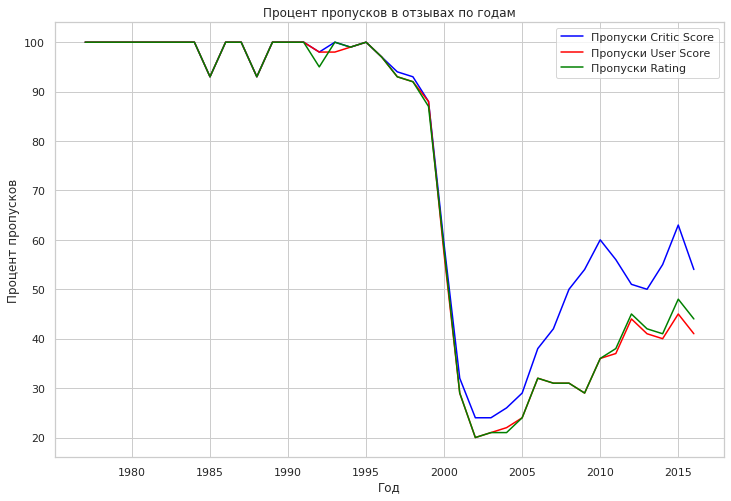

In [47]:
plt.figure(figsize=(12,8 ))
plt.plot(missing_values_by_year.index, missing_values_by_year['missing_critic_score_percentage'], label='Пропуски Critic Score', color='blue')
plt.plot(missing_values_by_year.index, missing_values_by_year['missing_user_score_percentage'], label='Пропуски User Score', color='red')
plt.plot(missing_values_by_year.index, missing_values_by_year['missing_rating_percentage'], label='Пропуски Rating', color='green')
plt.title('Процент пропусков в отзывах по годам')
plt.xlabel('Год')
plt.ylabel('Процент пропусков')
plt.legend()
plt.grid(True)
plt.show()

Пропуски по оценка и рейтингам  
1) возможно не все оценки выгрузились
2) а если это все возможные оценки, то пропуски в полне объяснимы. до 95 года игр было не много, и особо не думали об этом, с 94 года появились новые консоли и колличество игр увеличилось, и стало необходимо создавать рейтинги
- ESRB был создан в 1994 году Ассоциацией развлекательного программного обеспечения (ESA, ранее Ассоциацией интерактивного цифрового программного обеспечения (IDSA)) в ответ на критику спорных видеоигр с чрезмерно жестоким или сексуальным содержанием, особенно после слушаний в Конгрессе в 1993 году) 
- 94 Ноябрь — журнал Game Zero стал первым в Интернете журналом, посвящённым компьютерным и видеоиграм)

3) к 2002 году было оцененно максимальное колличество игр, 20-25% не оценненых игр скорее всего проходных или не заслуживающих внимания. и с 2002 наблюдается новая волна роста колличеств игр и новых платформ и уменьшается колличество оценок и рейтингов.

посмотрим 'count', 'min', 'max', 'mean', 'median' для продаж

In [48]:
(
        df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales']]
        .apply (['count', 'min', 'max', 'mean', 'median'])
        .T
        .style.format("{:,.2f}")
    )

,count,min,max,mean,median
na_sales,"16,668.00",0.00,41.36,0.26,0.08
eu_sales,"16,668.00",0.00,28.96,0.15,0.02
jp_sales,"16,668.00",0.00,10.22,0.08,0.00
other_sales,"16,668.00",0.00,10.57,0.05,0.01
all_sales,"16,668.00",0.00,82.54,0.53,0.17


посмотрим у какого % игр продажи 0

In [49]:
(
    df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales']]
    .quantile([.01, .2, .27, .36, .4, .6, .63, .99, .9988]) 
    .style.format("{:,.2f}")
)

,na_sales,eu_sales,jp_sales,other_sales,all_sales
0.01,0.00,0.00,0.00,0.00,0.01
0.2,0.00,0.00,0.00,0.00,0.05
0.27,0.01,0.00,0.00,0.00,0.07
0.36,0.03,0.01,0.00,0.00,0.10
0.4,0.04,0.01,0.00,0.01,0.11
0.6,0.12,0.04,0.00,0.01,0.25
0.63,0.13,0.05,0.01,0.02,0.28
0.99,2.79,1.94,1.27,0.63,5.47
0.9988,9.01,5.73,3.96,1.93,18.24


In [50]:
def find_non_zero_percentile(column):
    sorted_values = column.sort_values()
    for percentile in range(1, 101):  # начинаем с 1-го процентиля
        threshold = np.percentile(sorted_values, percentile)
        if threshold != 0:
            return percentile
    return np.nan  

non_zero_percentiles = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales']].apply(find_non_zero_percentile)

print(non_zero_percentiles)

na_sales       27
eu_sales       35
jp_sales       63
other_sales    40
all_sales       1
dtype: int64


игры у которых нет продаж копий а их всего 1%, могут быть онлайн играми. где оплата внутри игры.

In [51]:
df['rating'].value_counts()

E       3989
T       2961
M       1563
E10+    1419
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

<p>В столбце <code>rating</code> обычно указывается рейтинг игры, который определяет целевую аудиторию и возрастные ограничения для игры. Вот краткое описание каждого из значений:</p>

<ul>
	<li>
	<p><strong>E</strong>: (Everyone) - Игра подходит для всех возрастов. Обычно содержит минимальное насилие и является безопасной для детей.</p>
	</li>
	<li>
	<p><strong>E10+</strong>: (Everyone 10 and older) - Игра подходит для всех от 10 лет и старше. Может содержать немного более насильственные сцены или ненатуральные и страшные элементы, которые могут быть неподходящими для детей младшего возраста.</p>
	</li>
	<li>
	<p><strong>T</strong>: (Teen) - Игра подходит для подростков от 13 лет и старше. Может содержать некоторое насилие, кровь, непристойный контент или немного грубый язык.</p>
	</li>
	<li>
	<p><strong>M</strong>: (Mature) - Игра подходит для лиц старше 17 лет. Может содержать интенсивное насилие, кровь и кровавые сцены, сексуальный контент и/или грубый язык.</p>
	</li>
	<li>
	<p><strong>AO</strong>: (Adults Only) - Игра предназначена только для взрослых старше 18 лет. Может содержать сексуальный контент, грубый язык и/или кровавые сцены.</p>
	</li>
	<li>
	<p><strong>EC</strong>: (Early Childhood) - Игра предназначена для детей младшего возраста (обычно до 6 лет). Обычно не содержит материала, который мог бы показаться неуместным для детей младшего возраста.</p>
	</li>
	<li>
	<p><strong>K-A</strong>: (Kids to Adults) - Этот рейтинг устарел и использовался до введения рейтинга E. Те же самые правила применялись, но K-A был просто переименован в E.</p>
	</li>
	<li>
	<p><strong>RP</strong>: (Rating Pending) - Этот рейтинг используется, когда игра еще не получила официального рейтинга ESRB (Entertainment Software Rating Board). Обычно используется для игр, которые находятся в процессе разработки или еще не были оценены.</p>
	</li>
	<li>
	<p><strong>NaN</strong>: Значение NaN обычно означает отсутствие информации о рейтинге игры.</p>
	</li>
</ul>

<p>Эти рейтинги предназначены для помощи покупателям и родителям в принятии решений о приобретении и использовании игр в соответствии с возрастом и предпочтениями.</p>


'K-A', изменим на 'E', RP и пропуски изменим на 'Unknown'. Выбиваются EC и А0 своим единичным колличеством, если по заданию будет что то с этим рейтингом то вернусь к этому вопросу

In [52]:
df['rating'] = df['rating'].replace('K-A', 'E')
df['rating'] = df['rating'].replace('RP', 'Unknown')
df['rating'] = df['rating'].fillna('Unknown')


In [53]:
df['rating'].value_counts()

Unknown    6724
E          3992
T          2961
M          1563
E10+       1419
EC            8
AO            1
Name: rating, dtype: int64

Столбец 'user_score':
Уникальные значения: ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
Количество уникальных значений: 96

Столбец 'critic_score':
Уникальные значения: [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
Количество уникальных значений: 82


- Видим что 'user_score' исользуют оценки от 0 до 1, значит 0 тоже оценка. пропуски менять на 0 нельзя, оставим пропусками
- Аббревиатура 'tbd' означает "To Be Determined" (подлежит определению). В контексте столбца с оценкой пользователей она обычно указывает на то, что рейтинг этой игры пока не определен или ожидает подтверждения. сделаем тоже пропусками
- Видим что 'critic_score' не используют оценки ниже 10, значит первая возможная оценка это 10. Можно было бы поменять все пропуски на 0, но что бы не запутаться оставим пропусками
- Переведем 'critic_score' 'user_score' - лучше привести к одной размерности, так сравнивать будет удобнее. Приведем к 100-балльной, чтобы типы обоих величин были int (а не int и float)

In [54]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [55]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce') * 10

In [56]:
df['user_score'].unique()

array([80., nan, 83., 85., 66., 84., 86., 77., 63., 74., 82., 90., 79.,
       81., 87., 71., 34., 53., 48., 32., 89., 64., 78., 75., 26., 72.,
       92., 70., 73., 43., 76., 57., 50., 91., 65., 88., 69., 94., 68.,
       61., 67., 54., 40., 49., 45., 93., 62., 42., 60., 37., 41., 58.,
       56., 55., 44., 46., 59., 39., 31., 29., 52., 33., 47., 51., 35.,
       25., 19., 30., 27., 22., 20., 95., 21., 36., 28., 18., 38.,  0.,
       16., 96., 24., 17., 11.,  3., 15.,  7., 12., 23.,  5., 13.,  2.,
        6., 14.,  9., 10., 97.])

### Преобразование данных в нужные типы и оптимизация памяти

In [57]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,missing_years
count,16453.000000,16668.000000,16668.000000,16668.000000,16668.000000,16668.000000,8135.000000,7589.000000,16523.000000
mean,2006.482526,0.263620,0.145401,0.077695,0.047459,0.534150,68.969146,71.258269,2006.498517
std,5.893538,0.814419,0.503990,0.309254,0.186980,1.550176,13.936036,14.996581,5.865099
min,1977.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,1980.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,64.000000,2003.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,75.000000,2007.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,82.000000,2010.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,82.540000,98.000000,97.000000,2016.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16668 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16668 non-null  object 
 1   platform         16668 non-null  object 
 2   year_of_release  16453 non-null  float64
 3   genre            16668 non-null  object 
 4   na_sales         16668 non-null  float64
 5   eu_sales         16668 non-null  float64
 6   jp_sales         16668 non-null  float64
 7   other_sales      16668 non-null  float64
 8   all_sales        16668 non-null  float64
 9   critic_score     8135 non-null   float64
 10  user_score       7589 non-null   float64
 11  rating           16668 non-null  object 
 12  clean_name       16668 non-null  object 
 13  missing_years    16523 non-null  float64
dtypes: float64(9), object(5)
memory usage: 2.4+ MB


In [59]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: 
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 
    return "{:03.2f} MB".format(usage_mb)

удалим временные столбцы

In [60]:
df = df.drop(columns=['clean_name', 'missing_years'])

оптимизируем размер памяти и изменим типы данных

In [61]:
print(mem_usage(df))
# convert_category =['platform', 'genre', 'rating']
convert_category =['genre', 'rating']
df[convert_category] = df[convert_category].astype('category')
print(mem_usage(df))
convert_int8 = ['user_score', 'critic_score']
df[convert_int8] = df[convert_int8].astype('Int64', errors='ignore')
print(mem_usage(df))
df['year_of_release'] = df['year_of_release'].astype('Int64', errors='ignore')
print(mem_usage(df))

#convert_float32 = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales' ]
#df[convert_float32] = df[convert_float32].astype('float32')
#print(mem_usage(df))

5.87 MB
3.92 MB
3.95 MB
3.97 MB


In [62]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
count,16453.000000,16668.000000,16668.000000,16668.000000,16668.000000,16668.000000,8135.000000,7589.000000
mean,2006.482526,0.263620,0.145401,0.077695,0.047459,0.534150,68.969146,71.258269
std,5.893538,0.814419,0.503990,0.309254,0.186980,1.550176,13.936036,14.996581
min,1977.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,64.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,75.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,82.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,82.540000,98.000000,97.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16668 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16668 non-null  object  
 1   platform         16668 non-null  object  
 2   year_of_release  16453 non-null  Int64   
 3   genre            16668 non-null  category
 4   na_sales         16668 non-null  float64 
 5   eu_sales         16668 non-null  float64 
 6   jp_sales         16668 non-null  float64 
 7   other_sales      16668 non-null  float64 
 8   all_sales        16668 non-null  float64 
 9   critic_score     8135 non-null   Int64   
 10  user_score       7589 non-null   Int64   
 11  rating           16668 non-null  category
dtypes: Int64(3), category(2), float64(5), object(2)
memory usage: 2.0+ MB


привели к нужным типа данных и оптимизировали использование памяти на 54%

### Вывод

<p>Выполнены задания</p>

<p>&nbsp;- заменены названия столбцов&nbsp;</p>

<p>-&nbsp; преобразованны данные в нужные типы.</p>

<p>- оптимизированно использование памяти</p>

<p>- количество пропусков в столбцах от общего количества данных:</p>

<ul>
	<li>Год выпуска: 1.6%</li>
	<li>Оценка критиков: 51%</li>
	<li>Оценка пользователей: 55%</li>
	<li>Рейтинг: 41%</li>
</ul>


<p>-&nbsp;аббревиатуру &#39;tbd&#39; изменена на пропуски</p>

<p>- оценки пользователей и критиков приведены одной системе 1/100</p>

<p>- удаленно 52 строки не явных дубликата. (общей суммой 12мл копий.&nbsp; 0.13% от всех данных.)</p>

<p>- восстановлено 0.25% потеренных данных по году выпуска ( можно и все вернуть но я решил остановиться на лимите 0.5мл копий) Изначально было 1.4% потери. По году выпуска можно вернуть все потери умея пользоваться и имея API для&nbsp;www.igdb.com&nbsp;</p>

<p>&nbsp;</p>

<p>Пропуски в оценках могли появиться по 2 причинам</p>

<p>1) возможно не все данные выгрузились</p>

<p>2) а если это все возможные оценки, то пропуски в полне объяснимы. до 95 года игр было не много, и особо не думали об оценках, с 94 года появились новые консоли и колличество игр увеличилось, и стало необходимо создавать рейтинги (94 Ноябрь &mdash; журнал Game Zero стал первым в Интернете журналом, посвящённым компьютерным и видеоиграм) к 2002 году было оцененно максимальное колличество игр, а 20-25% не оценненых игр скорее всего проходных или не заслуживающих внимания. и с 2002 наблюдается новая волна роста колличеств игр и новых платформ и уменьшается колличество оценок и рейтингов.</p>

<p>&nbsp;</p>

<p>Рекомендации&nbsp;</p>

<p>1) при создание дф - нужо было обратит внимание на Названия (то что в скобочках может давать недельную информацию или для каждой записи отдельный регион, и тд.)</p>

<p>2) выгрузить все года еще раз, это не скрытая информация.&nbsp;</p>

<p>&nbsp;</p>

<p>То что я проделал для дубликатов и года выпуска эти действия просто не стоят трудозатрат. Это очень малая доля данных, ручные корректировки требуют много ресурсов, но аналитические выводы никак не повлияют.&nbsp; Объединение игр в одну строку - вопрос удобтсво, его можно сделать хоть как, на анализ это никак не повлияет, т.к. основные аналитические вопросы связаны с суммарныыми продажами по годам/жанрам/рейтингам и прочие. Объединение на это вообще не повлияет.</p>

<p>У меня было достаточно свободного времени и я по практиковался это делать. )</p>

<p>&nbsp;</p>

<pre>

&nbsp;</pre>


## Шаг 3. Проведите исследовательский анализ данных

### Анализ колличества игр выпускаемое в разные годы. Определение целевого периода.

In [64]:
games_by_year = df.pivot_table(index = 'year_of_release', 
                                      values = 'name', 
                                      aggfunc = 'count')


In [65]:
games_by_year.head()

,name
year_of_release,
1977,2
1978,1
1979,1
1980,10
1981,46


In [66]:
games_by_year.tail()

,name
year_of_release,
2012,656
2013,544
2014,581
2015,606
2016,502


Text(0, 0.5, 'Количество игр, шт.')

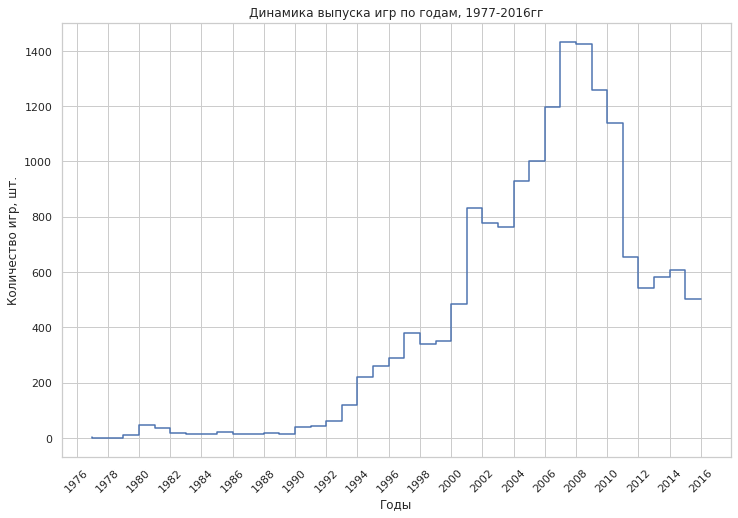

In [67]:
data = df[df['year_of_release'] > 0].groupby('year_of_release')['name'].count().reset_index()
plt.figure(figsize=(12,8))
sns.lineplot(data=data, x='year_of_release', ci=None, y='name', drawstyle='steps')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.xticks(rotation=45) 
plt.title('Динамика выпуска игр по годам, 1977-2016гг')
plt.xlabel('Годы')
plt.ylabel('Количество игр, шт.')

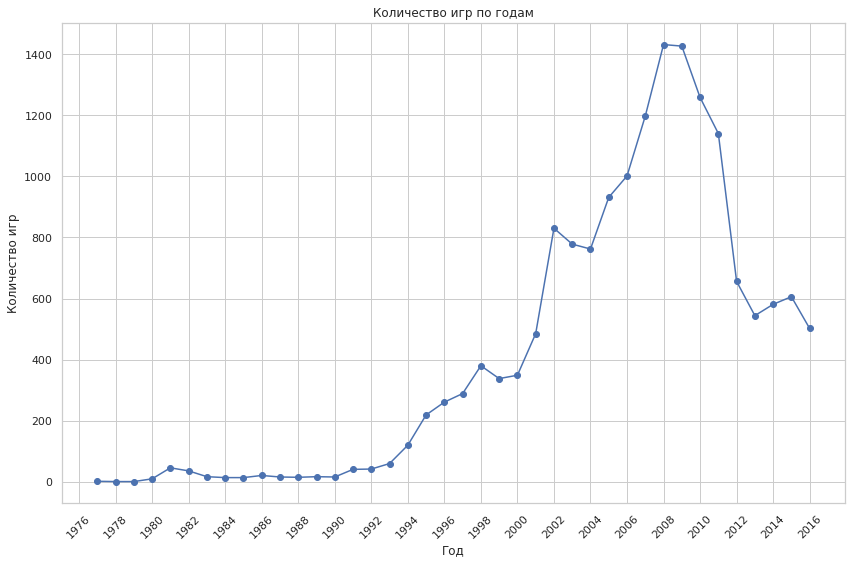

In [68]:
plt.figure(figsize=(12, 8))  
plt.plot(games_by_year.index, games_by_year.values, marker='o', linestyle='-')
plt.title('Количество игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))



plt.show()

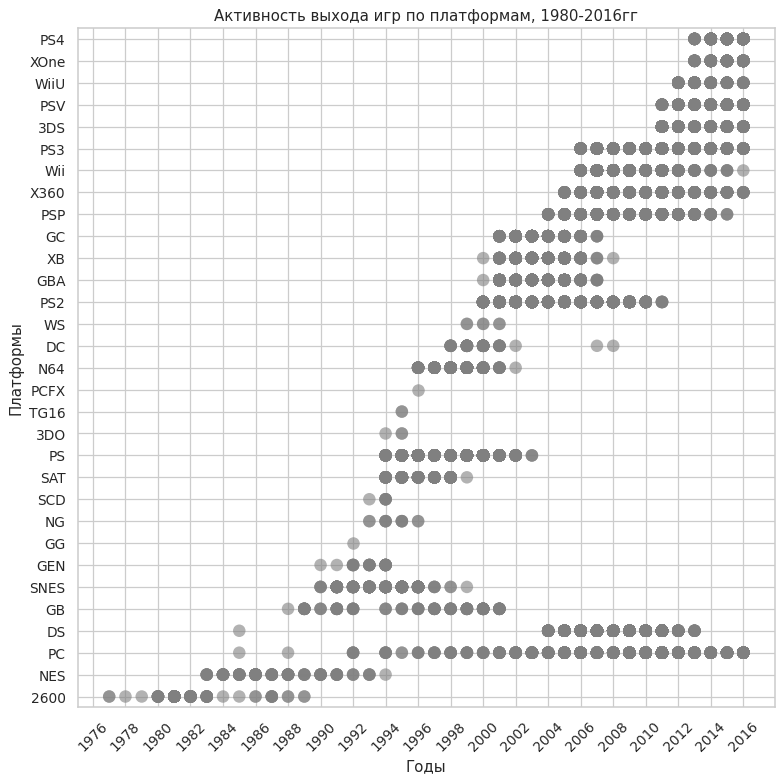

In [69]:
fig, ax = plt.subplots(figsize=(10,10), dpi= 90)
sns.stripplot(data=df[(df['year_of_release'] > 0)]
              .sort_values('year_of_release'), y='platform', x='year_of_release', jitter=False,  
              alpha=.6, size=10, color='grey')
plt.title('Активность выхода игр по платформам, 1980-2016гг')
plt.xlabel('Годы')
plt.grid(True)
plt.xticks(rotation=45) 
plt.gca().invert_yaxis() 
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.ylabel('Платформы')
plt.show()

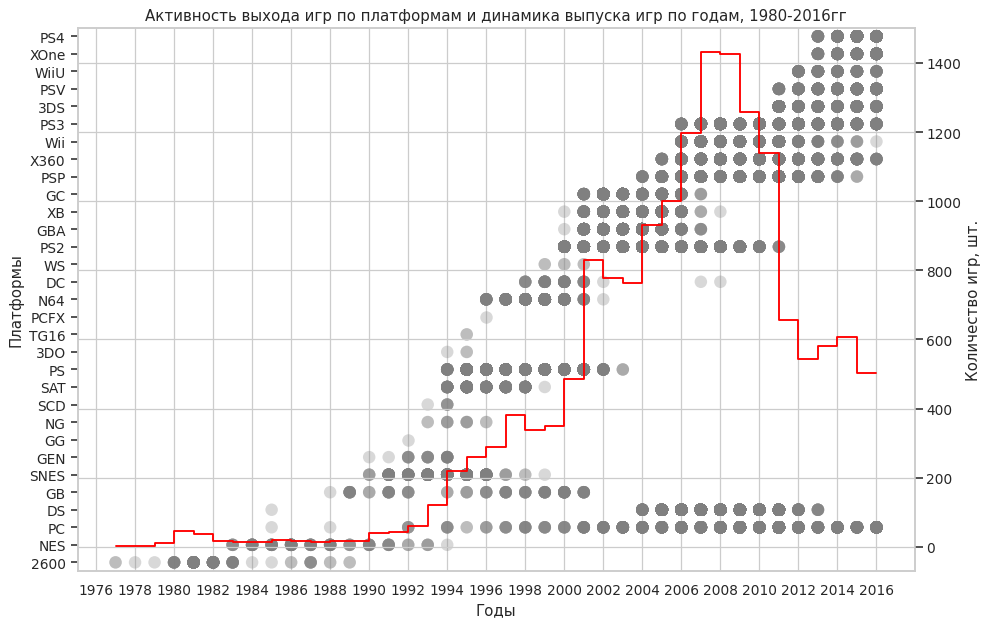

In [70]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=90)

# Создание основного графика
sns.stripplot(data=df[(df['year_of_release'] > 0)].sort_values('year_of_release'), 
              y='platform', x='year_of_release', jitter=False,  
              alpha=.3, size=10, color='grey', ax=ax)

# Наложение второй оси y для второго графика
ax2 = ax.twinx()

# Добавление линейного графика на вторую ось y
sns.lineplot(data=data, x='year_of_release', y='name', ci=None, drawstyle='steps', ax=ax2, color='red')

# Настройка осей и меток
ax.invert_yaxis()
ax.set_xlabel('Годы')
ax.set_ylabel('Платформы')
ax2.set_ylabel('Количество игр, шт.')

# Настройка меток графика
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax2.xaxis.set_major_locator(plt.MultipleLocator(2))
plt.xticks(rotation=45)

# Настройка заголовка
plt.title('Активность выхода игр по платформам и динамика выпуска игр по годам, 1980-2016гг')

# Показать график
plt.grid(True)
plt.show()

#### Вывод

Анализируя данные о выпуске игр в разные годы, мы заметили следующее:

Самые старые игры в выборке были выпущены в 1977 году, в то время как самые новые – в 2016 году.

График показывает рост количества выпускаемых игр с начала 1990-х годов, что, вероятно, связано с быстрым развитием компьютерных технологий и выходом новых консолей. Пик количества выпущенных игр приходится на 2008-2009 годы, а после этого происходит спад. Спад легко объясняется переходом со старой модели продажи копий на новые формат оплата игр в интернете, появление игр на мобильных устройствах

В 2000 году люди тратили на онлайновые игры и загружаемый контент всего доллар на человека, но к концу 2012 года траты подросли до 14 долларов и продолжают уверенно набирать высоту, пусть не так быстро, как хотелось бы. Именно поэтому вся индустрия так озабочена вопросами онлайновой торговли. Например, в 2010-м цифровые продажи Electronic Arts составляли мизерный процент от общего уровня доходов, в этом году они впервые сравнялись и даже превзошли доходы от торговли дисками, и хотя с выходом Battlefield 4 диски существенно отыграют свои позиции — к 2015 году преимущество онлайна станет неоспоримым.

Учитывая небольшое количество данных о играх, выпущенных до 1995 года, мы можем не учитывать эти данные в нашем анализе из-за их незначительного количества.

### Анализ изменения продаж по платформам. Выбор топ-5 платформ с наибольшими суммарными продажами

Создадим сводную таблицу, где суммируются общие продажи по каждой платформе.

In [71]:
platforms_sales = df.pivot_table(index='platform',
                           values='all_sales',
                           aggfunc='sum',
                           observed=False).sort_values(by='all_sales', ascending=False)

выведем 5 лидеров и 5 аутсайдеров

In [72]:
platforms_sales.head()


,all_sales
platform,
PS2,1249.94
X360,971.39
PS3,939.16
Wii,907.51
DS,805.63


In [73]:
platforms_sales.tail()


,all_sales
platform,
WS,1.42
TG16,0.16
3DO,0.10
GG,0.04
PCFX,0.03


построим диаграмму распределения продаж по платформам

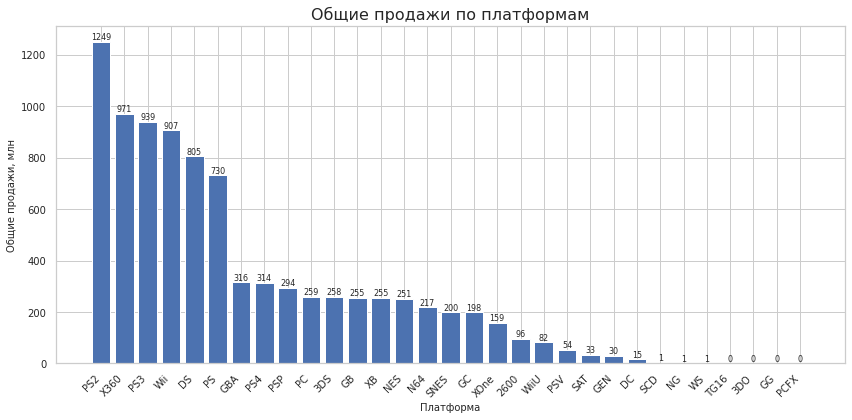

In [74]:
plt.figure(figsize=(12, 6))
bars = plt.bar(platforms_sales.index, platforms_sales['all_sales'])
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Общие продажи, млн', fontsize=10)
plt.title('Общие продажи по платформам', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

выбираем пять платформ с наибольшими общими продажами 

In [75]:
platforms_top5 = platforms_sales.head(5)
platforms_top5

,all_sales
platform,
PS2,1249.94
X360,971.39
PS3,939.16
Wii,907.51
DS,805.63


построим диаграмму распределения продаж по платформам топ-5

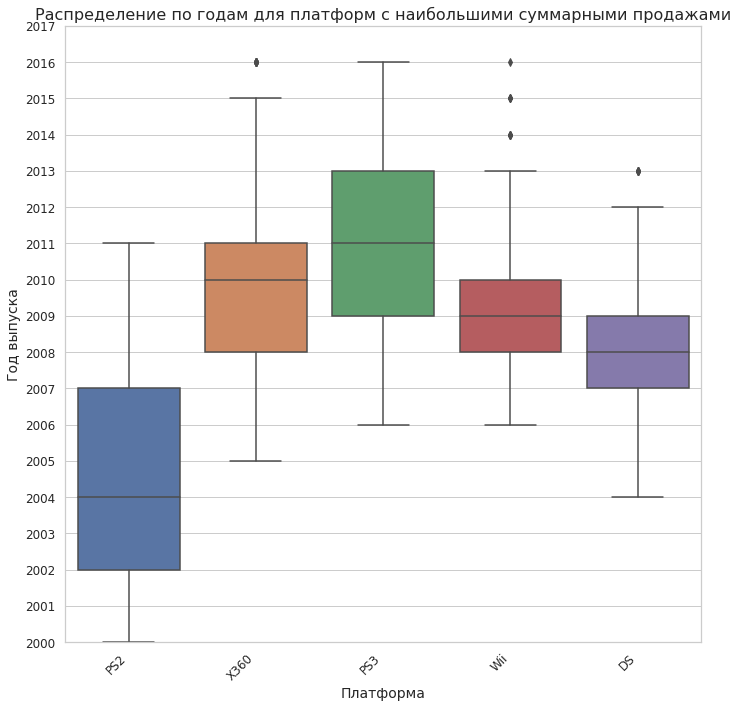

In [76]:
platforms_top5_names = platforms_top5.index
filtered_platforms_top5 = df.merge(pd.DataFrame(platforms_top5_names, columns=['platform']), on='platform')

plt.figure(figsize=(10, 10))
sns.boxplot(data=filtered_platforms_top5, x='platform', y='year_of_release', order=platforms_top5_names)
plt.title('Распределение по годам для платформ с наибольшими суммарными продажами', fontsize=16)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Год выпуска', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.grid(axis='y', linestyle='--', alpha=0.7, color='red')
plt.ylim(2000, 2017)
plt.tight_layout()
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
plt.show()

In [77]:
# platforms_top5_names.astype(str)

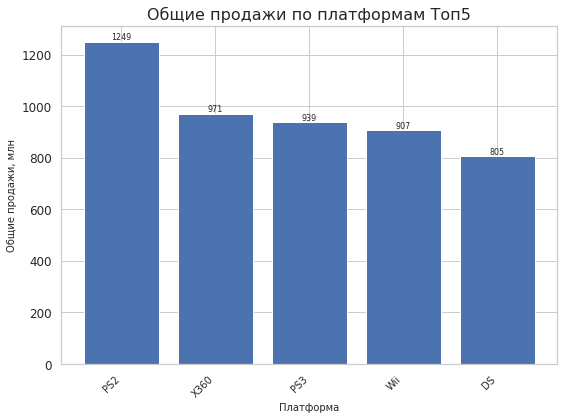

In [78]:
plt.figure(figsize=(8, 6))
bars = plt.bar(platforms_top5.index, platforms_top5['all_sales'])
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Общие продажи, млн', fontsize=10)
plt.title('Общие продажи по платформам Tоп5', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)


for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

на ящиках обнаружил выброс, связаный с некорректной датой выпуска. изменяем перед созданием ящиков

In [79]:
df[(df['platform'] == 'DS') & (df['year_of_release'] < 1990)]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0.02,<NA>,<NA>,Unknown


In [80]:
df.at[15957, 'year_of_release'] = 2010

In [81]:
display(df.loc[[15957]])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,2010,Action,0.0,0.0,0.02,0.0,0.02,<NA>,<NA>,Unknown


Строим Распределение по годам для платформ топ 5

Построим сводную таблица, что бы осортировать по столбцу 'Years' (разница между максимальным и минимальным значением) в порядке убывания.

In [82]:
def summary_stats(x):
    return pd.Series([x.count(), x.min(), x.max(), x.median(), x.max() - x.min() + 1], 
                     index=['Count', 'Min', 'Max', 'Median', 'Years'])

platforms_summary = (
    df.groupby('platform')['year_of_release']
    .apply(summary_stats)
    .unstack()
)

platforms_summary_sorted = platforms_summary.sort_values(by=('Years'), ascending=False)
platforms_summary_sorted.style.format("{:,.0f}")

,Count,Min,Max,Median,Years
platform,,,,,
PC,958,"1,985","2,016","2,010",32
GB,97,"1,988","2,001","1,997",14
2600,121,"1,977","1,989","1,982",13
NES,98,"1,983","1,994","1,986",12
X360,"1,235","2,005","2,016","2,010",12
PSP,"1,193","2,004","2,015","2,009",12
PS2,"2,127","2,000","2,011","2,004",12
DC,52,"1,998","2,008","2,000",11
Wii,"1,293","2,006","2,016","2,009",11


Средняя продолжительность выпуска игр для всех платформ

In [83]:
mean_years = platforms_summary['Years'].mean()
median_years = platforms_summary['Years'].median()

print("Среднее значение Years:", mean_years)
print("Медианное значение Years:", median_years)

Среднее значение Years: 8.096774193548388
Медианное значение Years: 7.0


построим диаграмму "жизненого цикла" по колличеству выпуска игр по всем платформам и выделим топ-5

In [84]:
platforms_top5

,all_sales
platform,
PS2,1249.94
X360,971.39
PS3,939.16
Wii,907.51
DS,805.63


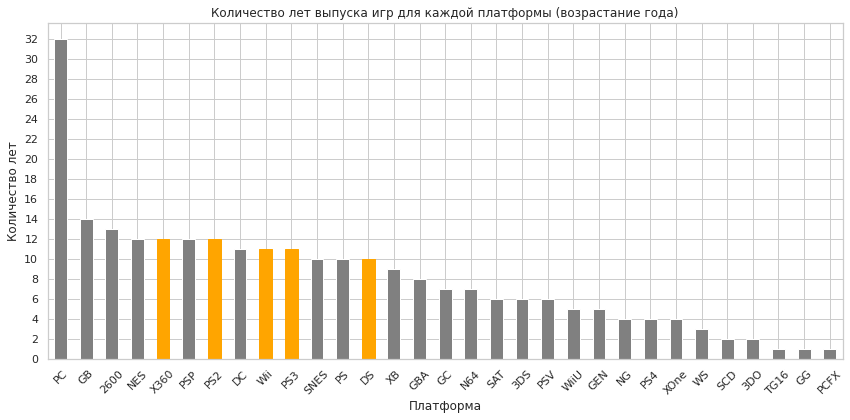

In [85]:

fig, ax1 = plt.subplots(figsize=(17, 12))

platforms_summary_sorted['Years'].plot(kind='bar', figsize=(12, 6), color='gray')
plt.title('Количество лет выпуска игр для каждой платформы (возрастание года)')
plt.xlabel('Платформа')
plt.ylabel('Количество лет')
plt.xticks(rotation=45)

platforms_top5_names = platforms_top5.index.tolist()

for platform in platforms_top5_names:
    platform_index = platforms_summary_sorted.index.get_loc(platform)
    plt.gca().get_children()[platform_index].set_color('orange')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2))

plt.tight_layout()
plt.show()

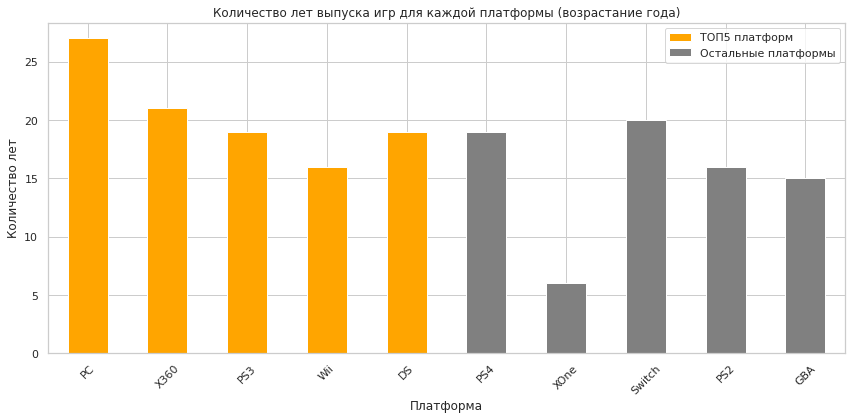

In [86]:
# Код ревьюера

# Предположим, что у нас есть DataFrame 'platforms_summary_sorted'
# Пример данных для демонстрации, замени на свои реальные данные
platforms_summary_sorted = pd.DataFrame({
    'Years': np.random.randint(1, 30, size=10),
    'Platform': ['PC', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'XOne', 'Switch', 'PS2', 'GBA']
}).set_index('Platform')

# ТОП5 платформ 
platforms_top5_names = ['PC', 'X360', 'PS3', 'Wii', 'DS']

# Создание цветовой мапы: если платформа в ТОП5, используем один цвет, иначе - другой
colors = ['orange' if platform in platforms_top5_names else 'gray' for platform in platforms_summary_sorted.index]

# Построение диаграммы
fig, ax = plt.subplots(figsize=(12, 6))
platforms_summary_sorted['Years'].plot(kind='bar', color=colors, ax=ax)
plt.title('Количество лет выпуска игр для каждой платформы (возрастание года)')
plt.xlabel('Платформа')
plt.ylabel('Количество лет')
plt.xticks(rotation=45)

# Создание пользовательской легенды
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='orange', label='ТОП5 платформ'),
                   Patch(facecolor='gray', label='Остальные платформы')]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

Сделаем наглядное представление времени жизни платформ и добавим график колличества игр по всем платформам и выделим топ-5

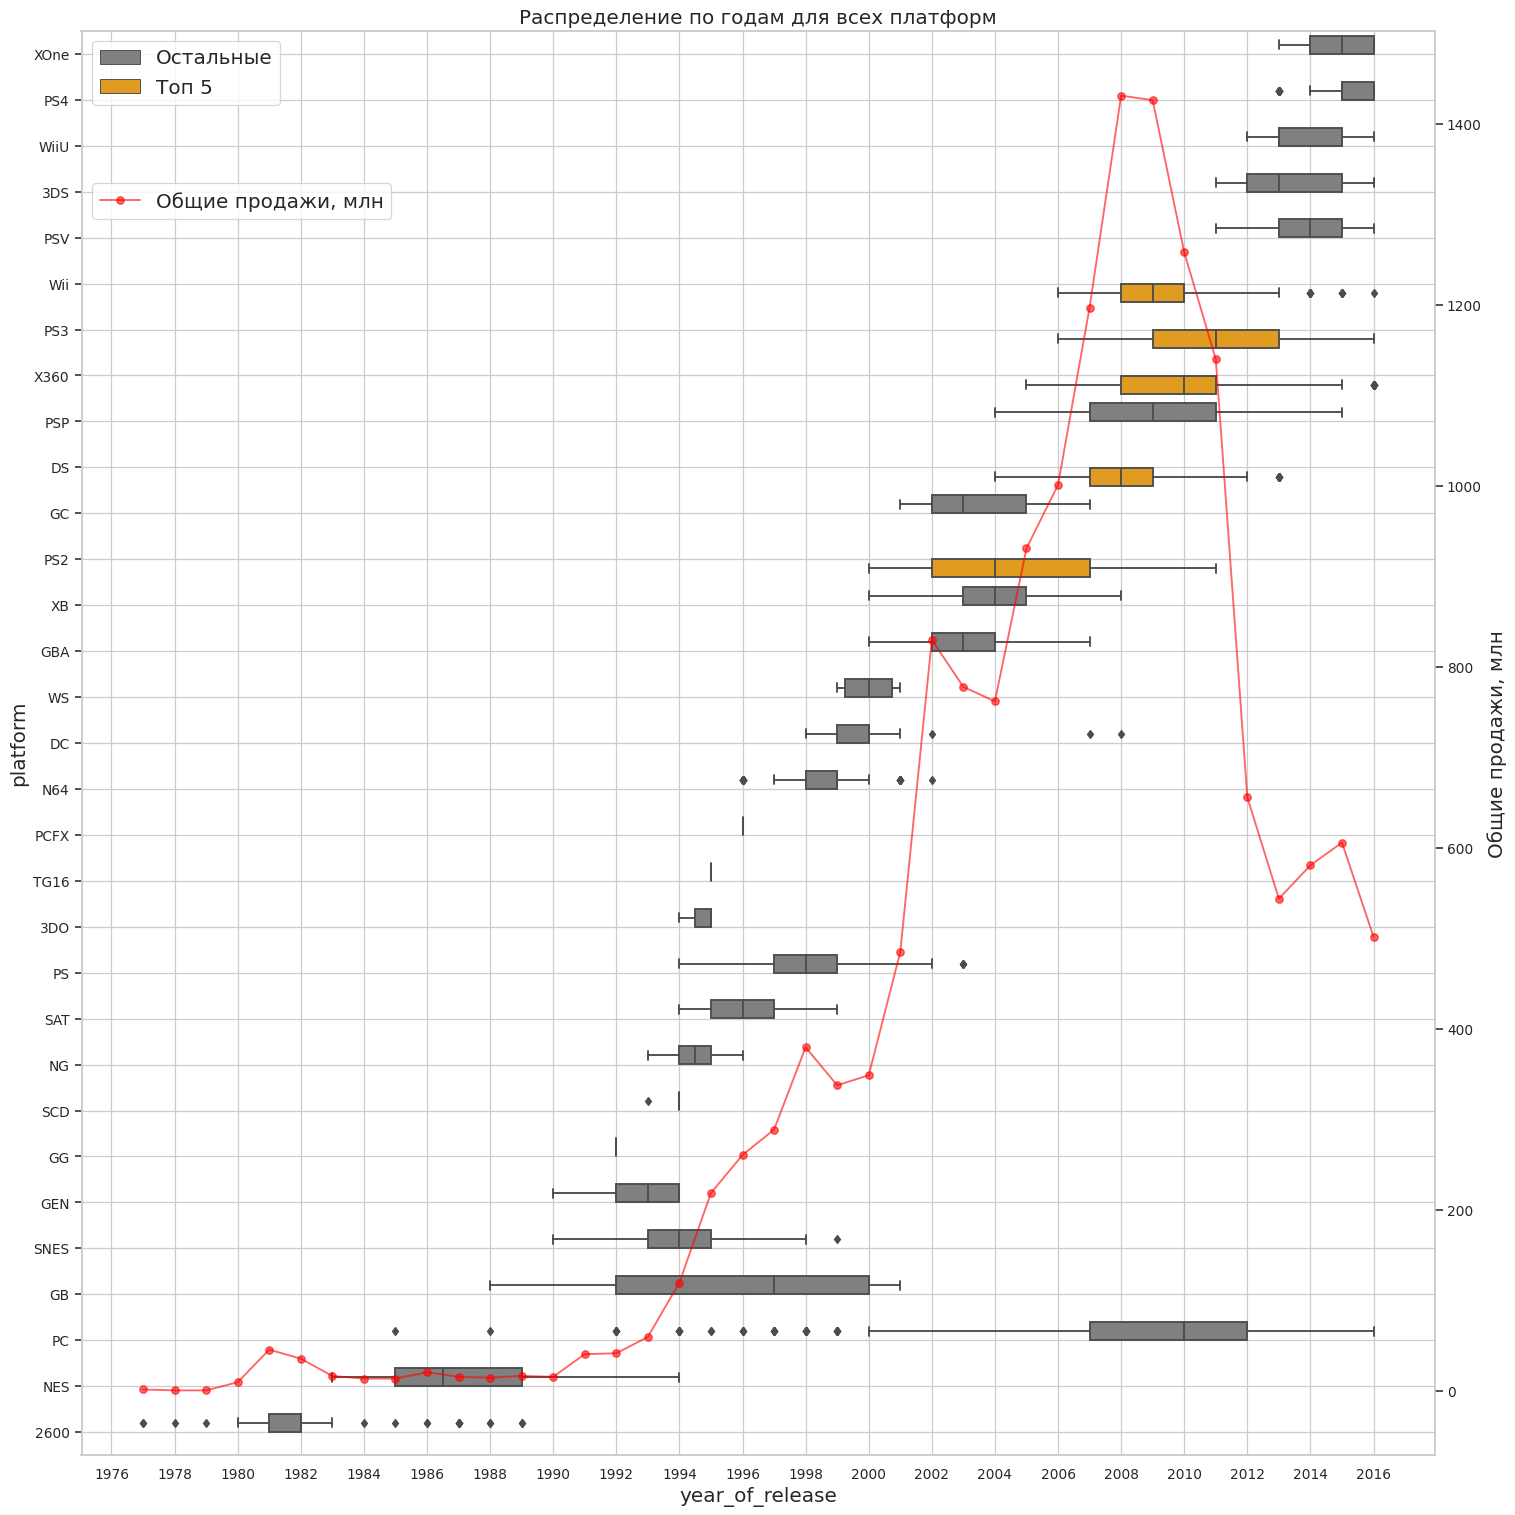

In [87]:
platforms_summary_sorted_min = platforms_summary.sort_values(by=('Min'), ascending=True)
df['is_top5'] = df['platform'].isin(platforms_top5.index)

fig, ax1 = plt.subplots(figsize=(17, 17),  dpi= 90)
ax2 = ax1.twinx()

ax2.plot(games_by_year.index, games_by_year.values, marker='o', linestyle='-', 
         color='red', label='Количество игр', alpha=0.6)
ax2.set_ylabel('Общие продажи, млн', fontsize=16)
ax1.set_xlabel('Год выпуска игр', fontsize=16)
ax1.set_ylabel('Платформа', fontsize=16)
sns.boxplot(data=df, y='platform', x='year_of_release', 
            order=platforms_summary_sorted_min.index[::-1], 
            hue='is_top5', ax=ax1, palette={True: 'orange', False: 'grey'})
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, ['Остальные', 'Топ 5'], loc='upper left', bbox_to_anchor=(0, 1), fontsize=16)
ax2.legend(['Общие продажи, млн'], loc='upper left', bbox_to_anchor=(0, 0.9), fontsize=16)

# ax1.tick_params(axis='both', which='major', labelsize=16) 
# ax2.tick_params(axis='y', which='major', labelsize=14)
ax1.set_title('Распределение по годам для всех платформ', fontsize=16)
plt.xticks(rotation=45)
ax1.grid(True)
ax2.grid(False)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))

plt.tight_layout()
plt.show()


#### Вывод 

теперь наглядно можно определить:
- годы активной жизни платформ
- активное время выпусков игр для каждой платформы
- увидеть как распределяется колличество выпуска игр для каждой платформы
- какие платформы с правоцировали резкие скачки скачки в индустриее
- как платформы начинали надоедать и сменялись новыми

Первый рост продаж с 1994 и пик приходится на 1998 благодаря PS, 
дальнейший рост в 2000 с выходом PS2, XB, GBA, GC их пик пришелся на 2002, 
в 2004 наблюдается рост из-за выхода новых платформ Wii, PS3, X360,Psp, Ds, так же еше активно продаются игры платформ предидущего периода, и весь top5 приходится на период 2006-2011, с пиком продаж в 2008-2009 год.
дальше идет падение почти в 3 раза к 2013 году (до уровня 2001 года)
Новые платформы Xone и PS4 задают небольшой рост продаж на ближайшие 2 года, так же продалжают продаваться и игры на другие платформы. 
2016 опять падение возможно это связано с неполными данными за 2016 год. если данные полные то, дальнейшей рост врядли стоит ждать. На рынке останутся текущие хедлайнеры со своими армиями фанатаов. А большинство людей распределятся на мобильные платформы.


<p>Анализируя данные и графики, можно заключить, что в среднем жизненный цикл всех платформ составляет 8 лет, а медианный 7 лет.&nbsp;</p>

<p>Топ-5 платформ по объему продаж игр включает в себя следующие: PS2, X360, PS3, Wii и DS.&nbsp; Срок жизни от&nbsp; 10 до 12 лет.</p>

<p>Интересно отметить, что платформа PC, которая существует уже 32 года, не входит в этот список. Возможно, это связано с тем что консоли лучше защищены от &quot;пиратства&quot; а на PC огромный рынок пиратства. Возможно и это решающий фактор существования платформы так долго.</p>

<p>Топ5 по объму продаж</p>

<ul>
	<li>PS2&nbsp; &nbsp; - 1249.94</li>
	<li>X360&nbsp; &nbsp; - 971.39</li>
	<li>PS3&nbsp; &nbsp; - 939.16</li>
	<li>Wii&nbsp; &nbsp; - 907.51</li>
	<li>DS&nbsp; &nbsp; - 805.63</li>
</ul>

<p>Большинство платформ из нашего набора данных уже устарели к 2016 году. Тем не менее, некоторые платформы остаются актуальными, такие как</p>

<p>PS4, XONEPC (не давно вышедшие)</p>

<p>3DS, PSV, WiiU, PS3 (которыми активно пользуются, те кто не успел обновиться)</p>

<p>ну и долгожитель PC.&nbsp;</p>

<p>Для дальнейшего анализа мы определим актуальный период, начиная с 2013 года, чтобы избежать учета устаревших платформ и сосредоточиться на текущих тенденциях в индустрии.</p>


### Анализ данных за соответствующий актуальный период. 

Выбираем актуальный период с 2011 по 2016 год, с учетом что в 2016 есть продажи

In [88]:
actual_df = df.query('year_of_release >= 2014')
platforms_with_2016_data = actual_df[actual_df['year_of_release'] == 2016]['platform'].unique()
actual_df = actual_df[actual_df['platform'].isin(platforms_with_2016_data)]
actual_df['year_of_release'].agg(['min', 'max'])

min    2014
max    2016
Name: year_of_release, dtype: int64

In [89]:
print("Количество уникальных платформ в DataFrame:", actual_df['platform'].nunique())

Количество уникальных платформ в DataFrame: 9


In [90]:
actual_platforms = actual_df.pivot_table(index='year_of_release', 
                                         columns='platform', 
                                         values='all_sales', 
                                         aggfunc='sum', 
                                         observed=True)
actual_platforms

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


Посмотрим на сколько % упали продажи с 2011 года в 2016

In [91]:
sales_2014 = actual_platforms.loc[2014]
sales_2016 = actual_platforms.loc[2016]

percent_change = ((sales_2016 - sales_2014) / sales_2014) * 100
percent_change_rounded = percent_change.round(decimals=1)

print("Процентное изменение продаж с 2014 по 2016 год:")
for platform, change in percent_change_rounded.items():
    print(f"{platform}: {change:.1f}%")

Процентное изменение продаж с 2014 по 2016 год:
3DS: -65.4%
PC: -60.5%
PS3: -92.5%
PS4: -30.7%
PSV: -64.3%
Wii: -95.2%
WiiU: -79.1%
X360: -95.6%
XOne: -51.6%


Посмотрим на сколько % упали продажи с 2015 года в 2016

In [92]:
sales_2015 = actual_platforms.loc[2015]
sales_2016 = actual_platforms.loc[2016]

percent_change = ((sales_2016 - sales_2015) / sales_2015) * 100
percent_change_rounded = percent_change.round(decimals=1)

print("Процентное изменение продаж с 2015 по 2016 год:")
for platform, change in percent_change_rounded.items():
    print(f"{platform}: {change:.1f}%")

Процентное изменение продаж с 2015 по 2016 год:
3DS: -45.5%
PC: -38.4%
PS3: -78.6%
PS4: -41.8%
PSV: -32.0%
Wii: -84.2%
WiiU: -71.9%
X360: -87.3%
XOne: -56.5%


In [93]:
platforms = ['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
sales_change_14_16 = [-65.4, -60.5, -92.5, -30.7, -64.3, -95.2, -79.1, -95.6, -51.6]
sales_change_15_16 = [-45.5, -38.4, -78.6, -41.8, -32.0, -84.2, -71.9, -87.3, -56.5]


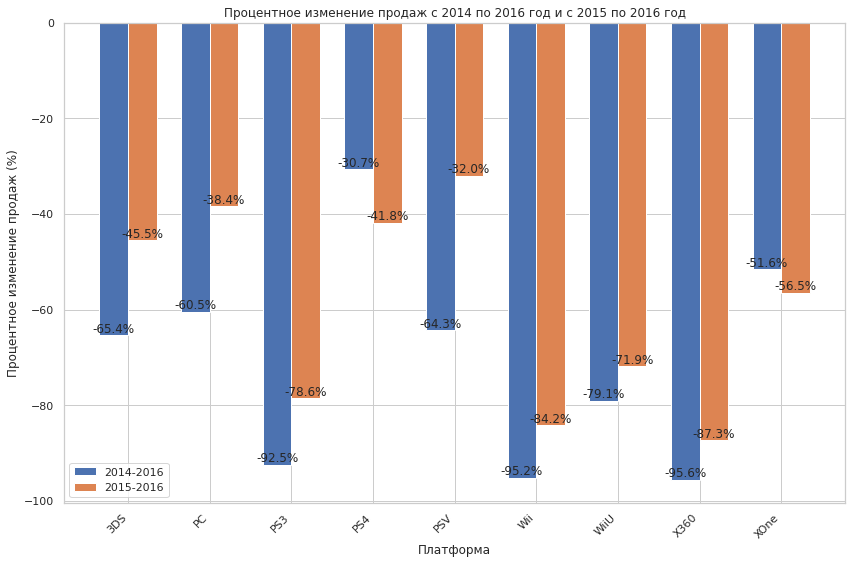

In [94]:
bar_width = 0.35


x = np.arange(len(platforms))

plt.figure(figsize=(12, 8))

plt.bar(x - bar_width/2, sales_change_14_16, bar_width, label='2014-2016')
plt.bar(x + bar_width/2, sales_change_15_16, bar_width, label='2015-2016')

plt.xlabel('Платформа')
plt.ylabel('Процентное изменение продаж (%)')
plt.title('Процентное изменение продаж с 2014 по 2016 год и с 2015 по 2016 год')
plt.xticks(x, platforms, rotation=45, ha='right')

plt.tight_layout()

for i in range(len(platforms)):
    plt.text(i - bar_width/2, sales_change_14_16[i], f"{sales_change_14_16[i]}%", ha='center', va='bottom')
    plt.text(i + bar_width/2, sales_change_15_16[i], f"{sales_change_15_16[i]}%", ha='center', va='bottom')

plt.legend()
plt.show()

Посмотрим сколько мл продаж было в 2015 и 2016 году

In [95]:
print("Продажи игр по платформам за 2015 год:")
print(actual_platforms.loc[2015].sort_values(ascending=False))

Продажи игр по платформам за 2015 год:
platform
PS4     118.90
XOne     60.14
3DS      27.78
PS3      16.82
WiiU     16.35
X360     11.96
PC        8.52
PSV       6.25
Wii       1.14
Name: 2015, dtype: float64


In [96]:
print("Продажи игр по платформам за 2016 год:")
print(actual_platforms.loc[2016].sort_values(ascending=False))

Продажи игр по платформам за 2016 год:
platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: 2016, dtype: float64


In [97]:
print("Продажи игр по платформам за 2014 год:")
print(actual_platforms.loc[2014].sort_values(ascending=False))

Продажи игр по платформам за 2014 год:
platform
PS4     100.00
XOne     54.07
PS3      47.76
3DS      43.76
X360     34.74
WiiU     22.03
PC       13.28
PSV      11.90
Wii       3.75
Name: 2014, dtype: float64


In [98]:
sales_2014 = {'PS4': 100.00, 'XOne': 54.07, 'PS3': 47.76, 
              '3DS': 43.76, 'X360': 34.74, 'WiiU': 22.03, 
              'PC': 13.28, 'PSV': 11.90, 'Wii': 3.75}
sales_2015 = {'PS4': 118.90, 'XOne': 60.14, '3DS': 27.78, 
              'PS3': 16.82, 'WiiU': 16.35, 'X360': 11.96, 
              'PC': 8.52, 'PSV': 6.25, 'Wii': 1.14}
sales_2016 = {'PS4': 69.25, 'XOne': 26.15, '3DS': 15.14, 
              'PC': 5.25, 'WiiU': 4.60, 'PSV': 4.25, 
              'PS3': 3.60, 'X360': 1.52, 'Wii': 0.18}

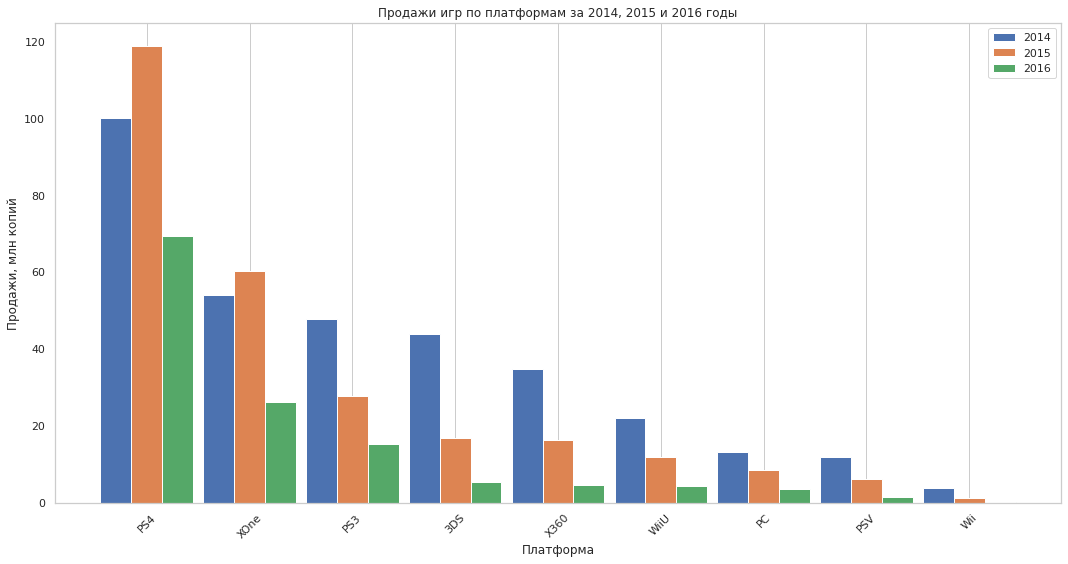

In [99]:


platforms = list(sales_2014.keys())
bar_width = 0.3

positions_14 = np.arange(len(platforms))
positions_15 = [pos + bar_width for pos in positions_14]
positions_16 = [pos + 2 * bar_width for pos in positions_14]

plt.figure(figsize=(15, 8))

plt.bar(positions_14, list(sales_2014.values()), width=bar_width, label='2014')
plt.bar(positions_15, list(sales_2015.values()), width=bar_width, label='2015')
plt.bar(positions_16, list(sales_2016.values()), width=bar_width, label='2016')

plt.xlabel('Платформа')
plt.ylabel('Продажи, млн копий')
plt.title('Продажи игр по платформам за 2014, 2015 и 2016 годы')
plt.xticks([pos + bar_width for pos in positions_14], platforms, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

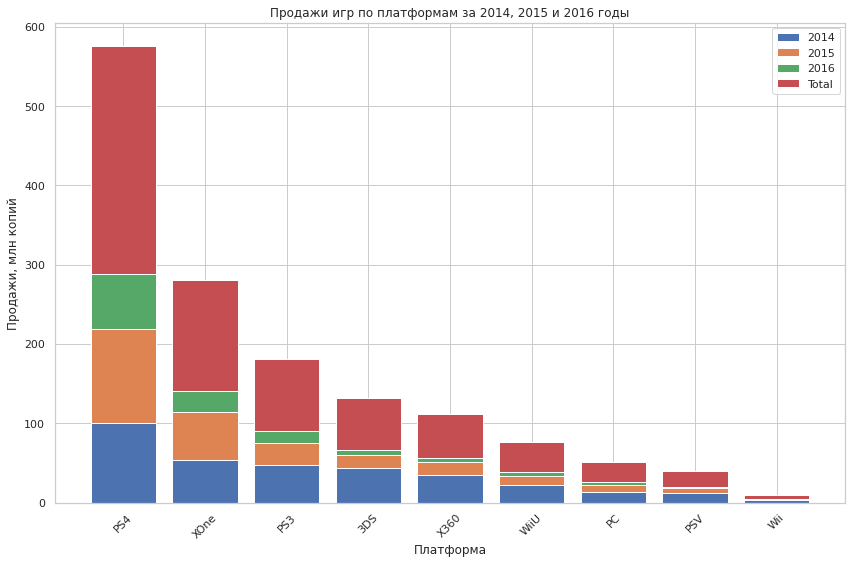

In [100]:
total_sales = [sum(sales) for sales in zip(sales_2014.values(), sales_2015.values(), sales_2016.values())]
bar_width = 0.8

positions = np.arange(len(platforms))  # Общие позиции для всех годов

plt.figure(figsize=(12, 8))
plt.bar(positions, list(sales_2014.values()), width=bar_width, label='2014')
plt.bar(positions, list(sales_2015.values()), width=bar_width, label='2015', bottom=list(sales_2014.values()))
plt.bar(positions, list(sales_2016.values()), width=bar_width, label='2016', bottom=[i+j for i,j in zip(list(sales_2014.values()), list(sales_2015.values()))])
plt.bar(positions, total_sales, width=bar_width, label='Total', bottom=[i+j+k for i,j,k in zip(list(sales_2014.values()), list(sales_2015.values()), list(sales_2016.values()))])

plt.xlabel('Платформа')
plt.ylabel('Продажи, млн копий')
plt.title('Продажи игр по платформам за 2014, 2015 и 2016 годы')
plt.xticks(positions, platforms, rotation=45)
plt.legend()

plt.tight_layout()

plt.show()

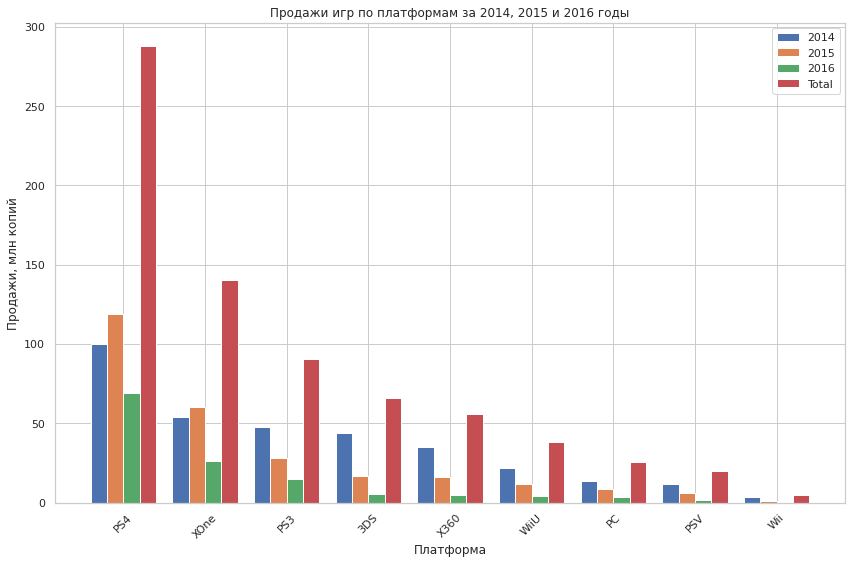

In [101]:
total_sales = [sum(sales) for sales in zip(sales_2014.values(), sales_2015.values(), sales_2016.values())]
bar_width = 0.2

positions_14 = np.arange(len(platforms))
positions_15 = [pos + bar_width for pos in positions_14]
positions_16 = [pos + 2 * bar_width for pos in positions_14]
positions_total = [pos + 3 * bar_width for pos in positions_14]

plt.figure(figsize=(12, 8))
plt.bar(positions_14, list(sales_2014.values()), width=bar_width, label='2014')
plt.bar(positions_15, list(sales_2015.values()), width=bar_width, label='2015')
plt.bar(positions_16, list(sales_2016.values()), width=bar_width, label='2016')
plt.bar(positions_total, total_sales, width=bar_width, label='Total')

plt.xlabel('Платформа')
plt.ylabel('Продажи, млн копий')
plt.title('Продажи игр по платформам за 2014, 2015 и 2016 годы')
plt.xticks([pos + 1.5 * bar_width for pos in positions_14], platforms, rotation=45)
plt.legend()

plt.tight_layout()

plt.show()

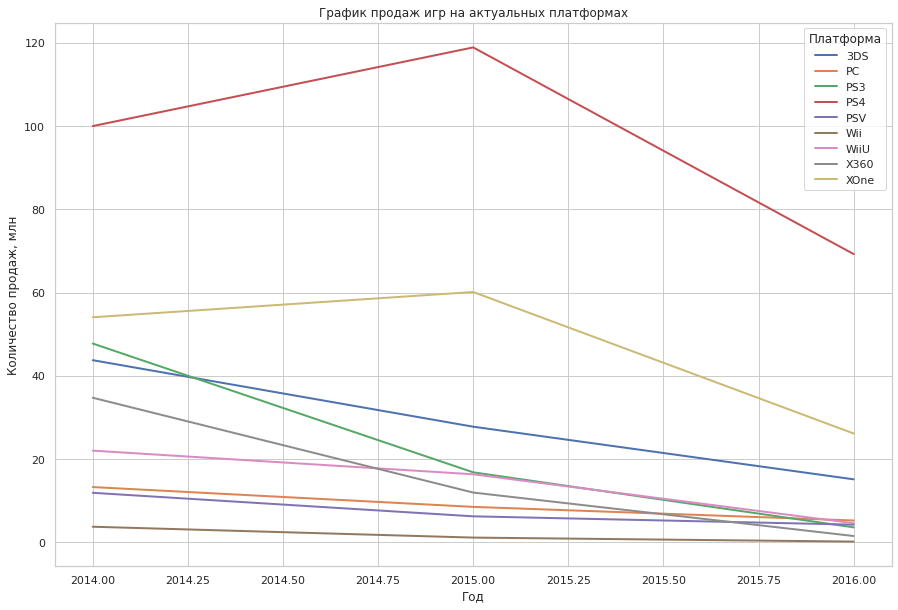

In [102]:

actual_platforms.plot(figsize=(15, 10), linewidth=2, )
plt.xlabel('Год')
plt.ylabel('Количество продаж, млн')
plt.title('График продаж игр на актуальных платформах')
plt.grid(True)
plt.legend(title='Платформа', loc='upper right')  
plt.show()


#### Вывод


<p>За актуальный период 2014 - 2016 год видим снижение продаж по всем платформам.</p><br>

<div style="display: flex;">
        <div style="flex: 1; padding-right: 20px;">
            <b>Процентное изменение <br>продаж
                с 2014 по 2016 год:</b>
            <ul>
                <li>3DS: -65.4%</li>
                <li>PC: -60.5%</li>
                <li>PS3: -92.5%</li>
                <li>PS4: -30.7%</li>
                <li>PSV: -64.3%</li>
                <li>Wii: -95.2%</li>
                <li>WiiU: -79.1%</li>
                <li>X360: -95.6%</li>
                <li>XOne: -51.6%</li>
            </ul>
        </div>
        <div style="flex: 1;">
            <b>Процентное изменение продаж <br>с 2015 по 2016 год:</b>
            <ul>
                <li>3DS: -45.5%</li>
                <li>PC: -38.4%</li>
                <li>PS3: -78.6%</li>
                <li>PS4: -41.8%</li>
                <li>PSV: -32.0%</li>
                <li>Wii: -84.2%</li>
                <li>WiiU: -71.9%</li>
                <li>X360: -87.3%</li>
                <li>XOne: -56.5%</li>
            </ul>
        </div>
    </div>





<p>&nbsp;</p>

<div style="display: flex;">
        <div style="flex: 1; padding-right: 20px;">
            <b>Продажи игр за 2015 год:</b>
            <ul>
                <li>PS4: 118.90</li>
                <li>XOne: 60.14</li>
                <li>3DS: 27.78</li>
                <li>PS3: 16.82</li>
                <li>WiiU: 16.35</li>
                <li>X360: 11.96</li>
                <li>PC: 8.52</li>
                <li>PSV: 6.25</li>
                <li>Wii: 1.14</li>
            </ul>
        </div>
        <div style="flex: 1;">
            <b>Продажи игр за 2016 год:</b>
            <ul>
                <li>PS4: 69.25</li>
                <li>XOne: 26.15</li>
                <li>3DS: 15.14</li>
                <li>PC: 5.25</li>
                <li>WiiU: 4.60</li>
                <li>PSV: 4.25</li>
                <li>PS3: 3.60</li>
                <li>X360: 1.52</li>
                <li>Wii: 0.18</li>
            </ul>
        </div>
    </div>


<p></p>


<p>В 2013 появляются PS4 и Xone - которых очень ждали преданные фанаты - по этому видимо небольшой рост продаж&nbsp; в ближайшие годы по этим платформам.</p>

<p>А в2012 Wiu который занял не большую нишу без особого роста.</p>

<p>Для прогноза на 2017 год мы можем воспользоваться процентным изменение продаж с 2015 по 2016 год и объёмом продаж 2015 и 2016 года:</p>





###  Выбор потенциально прибыльных платформ

<p>Мы можем выделить две платформы с потенциально высокой прибылью, но стоит учитывать что их падение по последнему году 41 и 56%:</p>

<ul>
	<li>PS4</li>
	<li>XOne</li>
</ul>

<p>Кроме того, можно добавить PC в список актуальных платформ, так как на этой платформе обычно наблюдаются стабильные продажи.</p>

<p>Ожидается, что в ближайшие время продажи на платформах X360 и Wii прекратятся.</p>

### Анализ глобальных продаж игр в разбивке по платформам. 

Выберем актуальные платформы, кроме тех которые в ближайшее время прекратят существование

In [103]:
actual_2016_platforms = ['PS4', 'XOne', '3DS', 'PC', 'PSV', 'WiiU', 'PS3']
global_sales = actual_df[actual_df['platform'].isin(actual_2016_platforms)].copy()
global_sales['platform'] = global_sales['platform'].astype(str)


In [104]:
print("Количество уникальных платформ:", global_sales['platform'].nunique())

Количество уникальных платформ: 7


In [105]:
unique_platforms = global_sales['platform'].unique()
print(unique_platforms)

['PS4' '3DS' 'XOne' 'WiiU' 'PS3' 'PC' 'PSV']


посмотрим основные статистики глобальных продаж для актуальных платформ

In [106]:
global_sales.groupby('platform')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


медианные значения, 0.04 и 0.09 для портативных  платформ, 0.06 для PC, и 0.185 - 0.205 для консолей, но есть для каждой консоли игры с огромным отрывом 

In [107]:
(
    global_sales.groupby('platform')['all_sales']
    .quantile([.9, .95, .97, .99, .9988])
    .unstack()
    .style.format("{:,.2f}")
)

,0.9,0.95,0.97,0.99,0.9988
platform,,,,,
3DS,0.75,1.74,2.93,6.78,10.63
PC,0.47,0.64,0.82,1.24,2.73
PS3,0.73,1.28,1.53,4.00,5.03
PS4,2.04,3.96,4.58,7.74,13.73
PSV,0.17,0.22,0.30,0.60,1.50
WiiU,1.22,2.23,4.24,5.49,6.90
XOne,1.59,2.88,3.39,5.05,6.87


3% игр больше 4.5мл. Будем считать их выбросами

In [108]:
global_sales_top = global_sales.query('all_sales >= 4.50')

In [109]:
global_sales_top.groupby('platform')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,3.0,8.790000,2.511195,7.14,7.3450,7.550,9.615,11.68
PS3,1.0,5.270000,NaN,5.27,5.2700,5.270,5.270,5.27
PS4,12.0,7.724167,3.073945,4.62,5.5775,7.385,8.130,14.63
WiiU,2.0,5.980000,1.569777,4.87,5.4250,5.980,6.535,7.09
XOne,3.0,6.040000,1.173840,5.26,5.3650,5.470,6.430,7.39


3% игр игр с большим объемом продаж

- 3DS	- 10 игр  от 4.59 до 14.6мл
- PS3  - 1 игра 5.2мл
- PS4	- 12 игр  от 4.62 до 14.63мл
- WiiU - 2 игры  от 4.87 до 7.09мл
- Xone - 3 игр  от 5.26 до 7.39мл



In [110]:
global_sales_top

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating,is_top5
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,<NA>,<NA>,Unknown,False
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97,83,M,False
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,11.68,<NA>,<NA>,Unknown,False
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82,43,E,False
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,7.98,<NA>,<NA>,Unknown,False
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,7.66,83,57,M,False
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,7.60,85,50,E,False
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,7.55,<NA>,<NA>,Unknown,False
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,7.39,<NA>,<NA>,Unknown,False
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,7.17,87,65,M,False


In [111]:
global_sales_other = global_sales.query('all_sales < 4.5')

In [112]:
global_sales_other.groupby('platform')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,209.0,0.288565,0.586757,0.01,0.03,0.08,0.2400,3.89
PC,151.0,0.179139,0.329359,0.01,0.02,0.06,0.2000,3.05
PS3,218.0,0.288578,0.537383,0.01,0.04,0.11,0.3150,4.36
PS4,364.0,0.536978,0.868837,0.01,0.05,0.17,0.6125,4.47
PSV,295.0,0.075932,0.141591,0.01,0.02,0.04,0.0900,1.96
WiiU,71.0,0.436901,0.706055,0.01,0.05,0.19,0.5250,4.44
XOne,225.0,0.543289,0.835601,0.01,0.05,0.20,0.6100,4.49


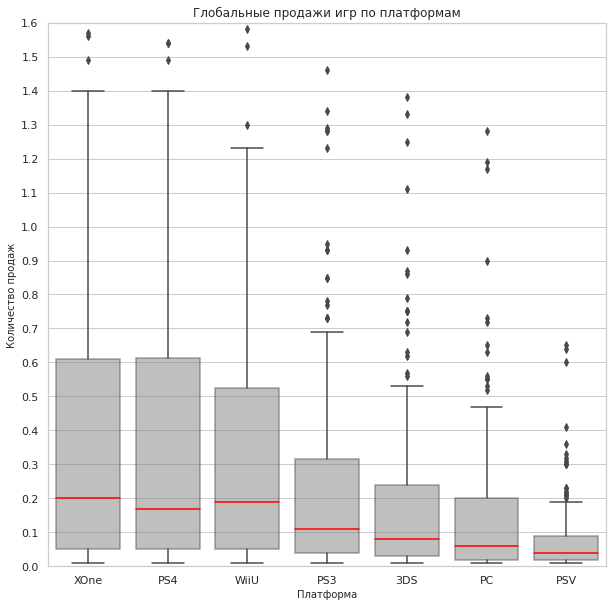

In [113]:

plt.figure(figsize=(10, 10))
boxprops = dict(facecolor='gray', alpha=0.5)
medianprops = dict(color='red')
sns.boxplot(data=global_sales_other, x='platform', y='all_sales', boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Количество продаж', fontsize=10)
plt.title('Глобальные продажи игр по платформам', fontsize=12)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.ylim(0, 1.6)  
plt.show()

#### Вывод

<p>Первые 3 места делят между собой консоли. Больше всего продаж у XOne.(колличество 225 игр) Дальше идет PS4(364игры) и WiiU(71игра). 
    
 Далее идет PS3 и 3DS, PC и PSV

3% игр игр с большим объемом продаж

- 3DS	- 10 игр  от 4.59 до 14.6мл
- PS3  - 1 игра 5.2мл
- PS4	- 12 игр  от 4.62 до 14.63мл
- WiiU - 2 игры  от 4.87 до 7.09мл
- Xone - 3 игр  от 5.26 до 7.39мл

</p>


### Анализ влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы. 

In [114]:
global_sales.query("platform == 'XOne'")[['critic_score','user_score', 'all_sales']].corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.440977,0.428677
user_score,0.440977,1.000000,-0.070384
all_sales,0.428677,-0.070384,1.000000


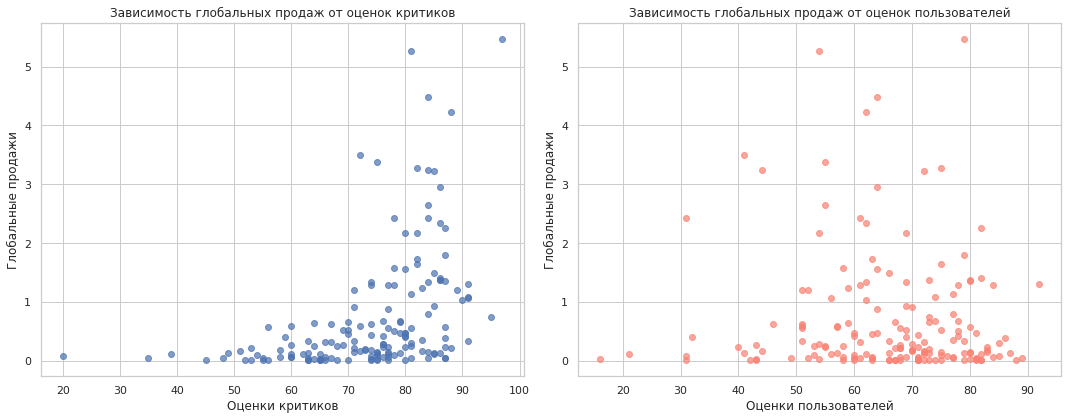

In [115]:
xone = global_sales.query("platform == 'XOne'")
xone_cleaned_critic = xone.dropna(subset=['critic_score', 'all_sales'])
xone_cleaned_user = xone.dropna(subset=['user_score', 'all_sales'])

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].scatter(xone_cleaned_critic['critic_score'], xone_cleaned_critic['all_sales'], alpha=0.7)
axs[0].set_title('Зависимость глобальных продаж от оценок критиков')
axs[0].set_xlabel('Оценки критиков')
axs[0].set_ylabel('Глобальные продажи')

axs[1].scatter(xone_cleaned_user['user_score'], xone_cleaned_user['all_sales'], alpha=0.7, color='salmon')
axs[1].set_title('Зависимость глобальных продаж от оценок пользователей')
axs[1].set_xlabel('Оценки пользователей')
axs[1].set_ylabel('Глобальные продажи')

plt.tight_layout()

plt.show()

#### Вывод

Рассматривая диаграммы, можно сказать, что критики оценивают выше и больше высоких оценок у игр с большими глобальными продажами. Пользователи ставят больше отрицательных оценок, даже играм с большими продажами.

### Анализ отзывов и их влияния на актуальных платформах

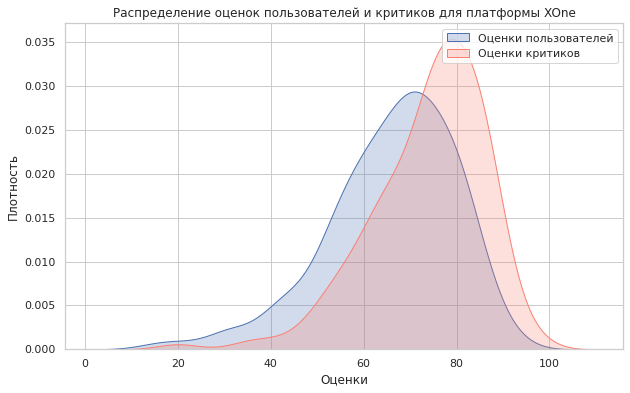

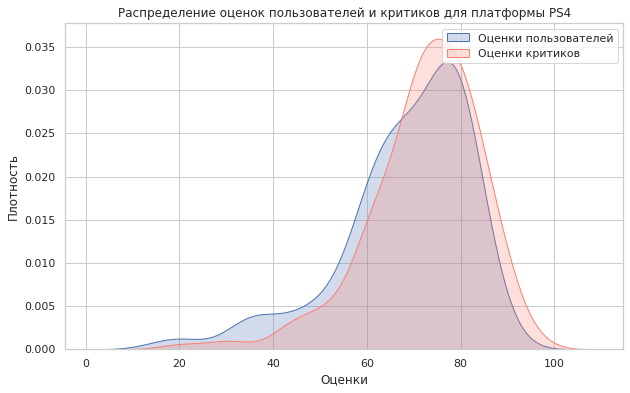

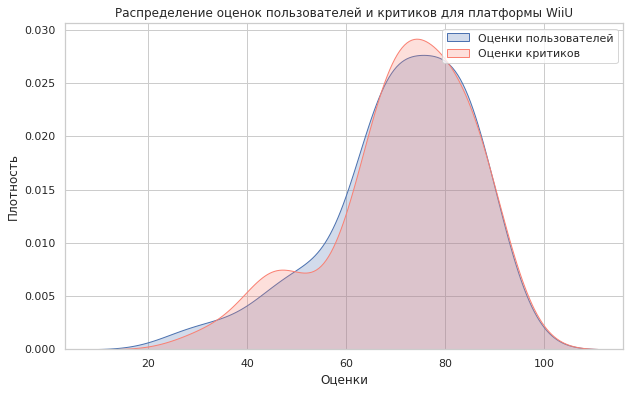

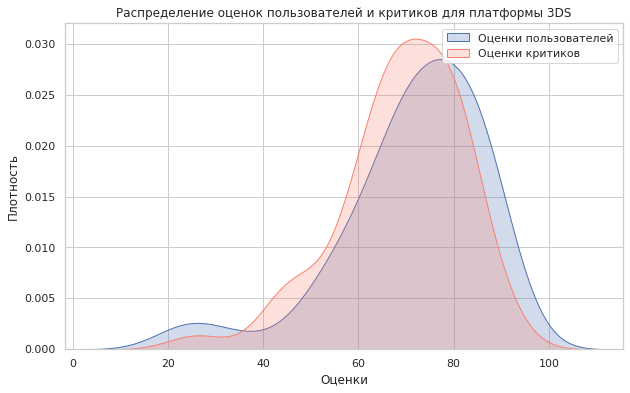

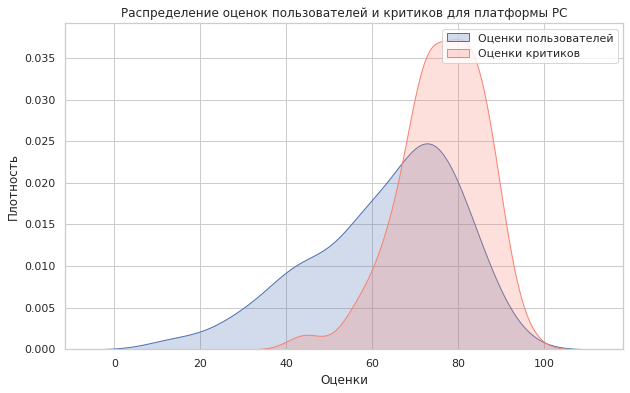

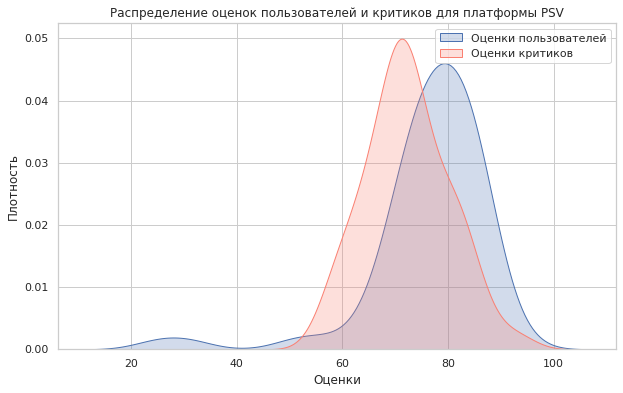

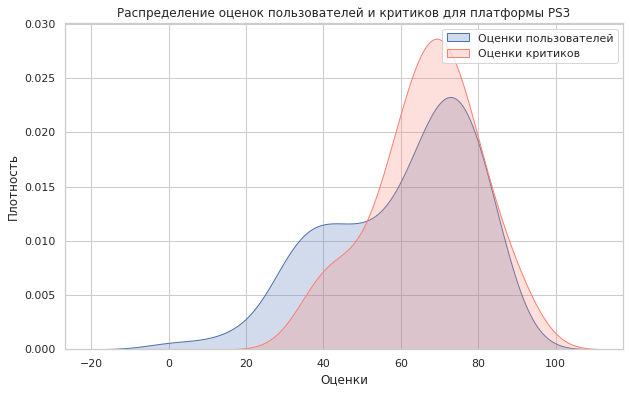

In [116]:
def plot_scores_distribution(data, platform_name):
    platform_data = data.query(f"platform == '{platform_name}'").copy()  
    
    platform_data[['user_score', 'critic_score']] = platform_data[['user_score', 'critic_score']].astype(float)
    
    plt.figure(figsize=(10, 6))
    sns.kdeplot(platform_data['user_score'], label='Оценки пользователей', fill=True, )
    sns.kdeplot(platform_data['critic_score'], label='Оценки критиков', fill=True,  color='salmon')

    plt.xlabel('Оценки')
    plt.ylabel('Плотность')
    plt.title(f'Распределение оценок пользователей и критиков для платформы {platform_name}')
    plt.legend()
    plt.show()

plot_scores_distribution(global_sales, 'XOne')
plot_scores_distribution(global_sales, 'PS4')
plot_scores_distribution(global_sales, 'WiiU')
plot_scores_distribution(global_sales, '3DS')
plot_scores_distribution(global_sales, 'PC')
plot_scores_distribution(global_sales, 'PSV')
plot_scores_distribution(global_sales, 'PS3')


- 'XOne' - критики выше оценивают игры
- 'PS4' - оценки критиков и пользователей распределены практически одинаково. но критики немного выше оценивают.
- 'WiiU'  - оценки критиков и пользователей распределены практически одинаково. но критики немного выше оценивают.
- '3DS' - пользователи выше оценивают игру, чем критики, но и низкие оценки ставят больше.
- 'PC' - практически одинаково оценивают, а пользователи ставят больше низких оценок.
- 'PSV' - пользователи выше оценивают игру, чем критики, но и низкие оценки ставят больше.
- 'PS3' - практически одинаково оценивают, но пользователи ставят больше низких оценок.

In [117]:

actual_platforms = actual_df.query('platform in ("XOne", "PS4", "PC", "WiiU", "3DS", "PSV", "PS3")')

# df_platform = actual_df.query('platform in ("XOne", "PS4", "PC", "WiiU")')

In [118]:
actual_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating,is_top5
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,<NA>,<NA>,Unknown,False
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97,83,M,False
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,11.68,<NA>,<NA>,Unknown,False
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82,43,E,False
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,7.98,<NA>,<NA>,Unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,<NA>,<NA>,Unknown,False
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.01,<NA>,<NA>,Unknown,False
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,<NA>,<NA>,Unknown,True
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,<NA>,<NA>,Unknown,False


In [119]:
def count_coeff_corr(pl):
    return [pl, 
            actual_platforms[actual_platforms['platform'] == pl]['all_sales']
            .corr(actual_platforms[actual_platforms['platform'] == pl]['user_score']),
            actual_platforms[(actual_platforms['platform'] == pl) & (actual_platforms['critic_score'] > 0)]['all_sales']
            .corr(actual_platforms[(actual_platforms['platform'] == pl) & (actual_platforms['critic_score'] > 0)]['critic_score']),
           actual_platforms[actual_platforms['platform'] == pl]['critic_score']
            .corr(actual_platforms[actual_platforms['platform'] == pl]['user_score'])
           ]

In [120]:
actual_platforms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1554 entries, 31 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             1554 non-null   object  
 1   platform         1554 non-null   object  
 2   year_of_release  1554 non-null   Int64   
 3   genre            1554 non-null   category
 4   na_sales         1554 non-null   float64 
 5   eu_sales         1554 non-null   float64 
 6   jp_sales         1554 non-null   float64 
 7   other_sales      1554 non-null   float64 
 8   all_sales        1554 non-null   float64 
 9   critic_score     692 non-null    Int64   
 10  user_score       803 non-null    Int64   
 11  rating           1554 non-null   category
 12  is_top5          1554 non-null   bool    
dtypes: Int64(3), bool(1), category(2), float64(5), object(2)
memory usage: 143.4+ KB


In [121]:
actual_platforms.loc[:, 'user_score'] = actual_platforms['user_score'].astype(float)
actual_platforms.loc[:, 'critic_score'] = actual_platforms['critic_score'].astype(float)

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [122]:
# actual_platforms = actual_platforms.dropna(subset=['all_sales', 'user_score', 'critic_score'])

In [123]:
output = pd.DataFrame()
for pl in actual_platforms['platform'].unique():
    output = pd.concat([output, pd.DataFrame(count_coeff_corr(pl)).T])
output.columns = ['platform', 'corr_user_sc_sales', 'corr_critic_sc_sales', 'corr_critic_user_sc']
output.set_index('platform')

,corr_user_sc_sales,corr_critic_sc_sales,corr_critic_user_sc
platform,,,
PS4,-0.040132,0.402661,0.546434
3DS,0.215193,0.314117,0.862485
XOne,-0.070384,0.428677,0.440977
WiiU,0.407926,0.370201,0.763536
PS3,-0.166761,0.446575,0.693445
PC,-0.071597,0.174634,0.466099
PSV,-0.168455,0.042665,0.524066


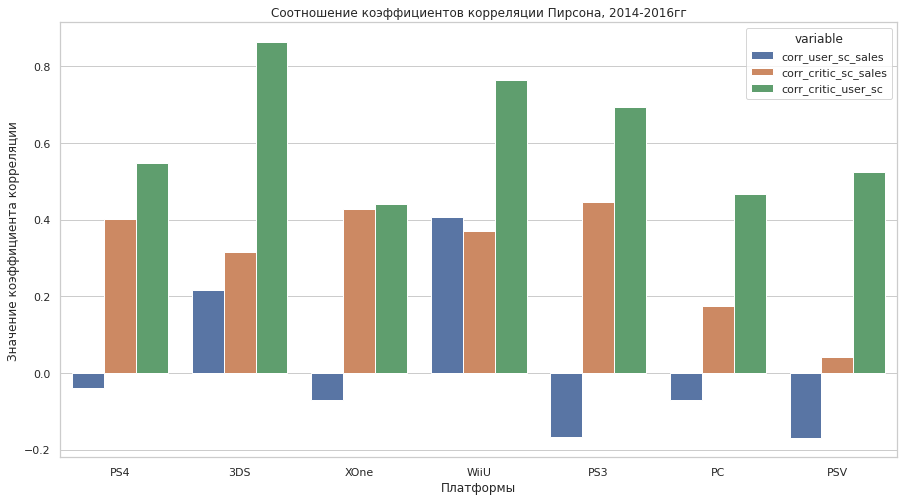

In [124]:
plt.figure(figsize=(15,8))
sns.barplot(data=output.melt(id_vars='platform'), x='platform', y='value', hue='variable')
plt.title('Соотношение коэффициентов корреляции Пирсона, 2014-2016гг')
plt.xlabel('Платформы')
plt.ylabel('Значение коэффициента корреляции')
plt.show()

построим корреляционые матрицы

In [125]:
global_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1554 entries, 31 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             1554 non-null   object  
 1   platform         1554 non-null   object  
 2   year_of_release  1554 non-null   Int64   
 3   genre            1554 non-null   category
 4   na_sales         1554 non-null   float64 
 5   eu_sales         1554 non-null   float64 
 6   jp_sales         1554 non-null   float64 
 7   other_sales      1554 non-null   float64 
 8   all_sales        1554 non-null   float64 
 9   critic_score     692 non-null    Int64   
 10  user_score       803 non-null    Int64   
 11  rating           1554 non-null   category
 12  is_top5          1554 non-null   bool    
dtypes: Int64(3), bool(1), category(2), float64(5), object(2)
memory usage: 143.4+ KB


In [126]:
def correlation_matrix(data, platform_name):
    platform_data = data.query(f"platform == '{platform_name}'")
    correlation = platform_data[['critic_score', 'user_score', 'all_sales']].corr()
    return correlation

print("Корреляционная матрица для XOne:")
print(correlation_matrix(global_sales, 'XOne'))

print("\nКорреляционная матрица для PS4:")
print(correlation_matrix(global_sales, 'PS4'))

print("\nКорреляционная матрица для WiiU:")
print(correlation_matrix(global_sales, 'WiiU'))

print("\nКорреляционная матрица для 3DS:")
print(correlation_matrix(global_sales, '3DS'))

print("\nКорреляционная матрица для PC:")
print(correlation_matrix(global_sales, 'PC'))

print("\nКорреляционная матрица для PSV:")
print(correlation_matrix(global_sales, 'PSV'))

print("\nКорреляционная матрица для PS3:")
print(correlation_matrix(global_sales, 'PS3'))

Корреляционная матрица для XOne:
              critic_score  user_score  all_sales
critic_score      1.000000    0.440977   0.428677
user_score        0.440977    1.000000  -0.070384
all_sales         0.428677   -0.070384   1.000000

Корреляционная матрица для PS4:
              critic_score  user_score  all_sales
critic_score      1.000000    0.546434   0.402661
user_score        0.546434    1.000000  -0.040132
all_sales         0.402661   -0.040132   1.000000

Корреляционная матрица для WiiU:
              critic_score  user_score  all_sales
critic_score      1.000000    0.763536   0.370201
user_score        0.763536    1.000000   0.407926
all_sales         0.370201    0.407926   1.000000

Корреляционная матрица для 3DS:
              critic_score  user_score  all_sales
critic_score      1.000000    0.862485   0.314117
user_score        0.862485    1.000000   0.215193
all_sales         0.314117    0.215193   1.000000

Корреляционная матрица для PC:
              critic_score  user_sc

#### Вывод

<p>Из матриц видно следующее:</p>

<ul>
	<li>Для Xbox One (XOne):
	<ul>
		<li>Корреляция между общими продажами и оценками критиков составляет 0.43, что указывает на умеренную положительную связь.</li>
		<li>Корреляция между общими продажами и оценками пользователей незначительна (-0.07), что говорит о слабой связи между оценками пользователей и объемом продаж игр на данной платформе.</li>
	</ul>
	</li>
	<li>Для PlayStation 4 (PS4):
	<ul>
		<li>Существует умеренная положительная связь между общими продажами и оценками критиков (0.40).</li>
		<li>Оценки пользователей также имеют умеренную положительную корреляцию с продажами (0.55), что означает, что высокие оценки пользователей часто сопровождаются высокими объемами продаж.</li>
	</ul>
	</li>
	<li>Для Wii U (WiiU):
	<ul>
		<li>Корреляция между общими продажами и оценками критиков существенна: 0.37.</li>
		<li>Корреляция между общими продажами и оценками пользователей также значительна (0.41).</li>
		<li>Это указывает на то, что как оценки критиков, так и пользователей могут существенно влиять на объемы продаж игр для этой платформы.</li>
	</ul>
	</li>
	<li>Для Nintendo 3DS (3DS):
	<ul>
		<li>Общие продажи имеют умеренную положительную корреляцию с оценками критиков (0.31) и оценками пользователей (0.22).</li>
		<li>Это может указывать на то, что оценки влияют на продажи игр для 3DS, но в меньшей степени, чем для других платформ.</li>
	</ul>
	</li>
	<li>Для PC:
	<ul>
		<li>Корреляция между общими продажами и оценками критиков составляет 0.17, что является незначительным значением.</li>
		<li>Оценки пользователей также слабо коррелируют с объемами продаж (-0.07).</li>
	</ul>
	</li>
	<li>Для PlayStation Vita (PSV):
	<ul>
		<li>Корреляция между общими продажами и оценками критиков незначительна (0.04).</li>
		<li>Оценки пользователей имеют слабую отрицательную корреляцию с объемами продаж (-0.17).</li>
	</ul>
	</li>
	<li>Для PlayStation 3 (PS3):
	<ul>
		<li>Корреляция между общими продажами и оценками критиков является существенной (0.45).</li>
		<li>Однако, оценки пользователей имеют отрицательную корреляцию с объемами продаж (-0.17), что может быть неожиданным результатом.</li>
	</ul>
	</li>
</ul>

<p>Общий вывод: оценки критиков и пользователей влияют на объемы продаж игр на разных платформах, хотя степень влияния может различаться.</p>

<p>&nbsp;</p>


Самая высокая степень влияния оценок критиков на продажи у PS3, скорее всего связано с продолжительностью жизни платформы. А оценок пользователей у WiiU

### Аналих общего распределение игр по жанрам. 


строим сводную таблицу

In [127]:
genre_table = actual_df.pivot_table(index='genre',
                           values= 'all_sales',
                           aggfunc='sum',
                           observed=False).sort_values(by='all_sales', ascending=False)
total_sales = genre_table['all_sales'].sum()
genre_table['percentage'] = genre_table['all_sales'].apply(lambda x: (x / total_sales) * 100).round(1)
genre_table

,all_sales,percentage
genre,,
Action,199.16,27.3
Shooter,170.94,23.4
Sports,109.39,15.0
Role-Playing,101.44,13.9
Misc,37.53,5.1
Fighting,28.22,3.9
Racing,27.52,3.8
Platform,18.09,2.5
Adventure,17.50,2.4


In [128]:
genre_table_median = actual_df.pivot_table(index='genre', 
                                    values='all_sales', 
                                    aggfunc = 'median', 
                                    observed=False).sort_values(by='all_sales', ascending=False)
total_sales_m = genre_table_median['all_sales'].sum()
genre_table_median['percentage'] = genre_table_median['all_sales'].apply(lambda x: (x / total_sales_m) * 100).round(1)
genre_table_median

,all_sales,percentage
genre,,
Shooter,0.515,32.5
Sports,0.190,12.0
Platform,0.140,8.8
Fighting,0.125,7.9
Role-Playing,0.110,6.9
Simulation,0.100,6.3
Action,0.090,5.7
Misc,0.090,5.7
Racing,0.090,5.7


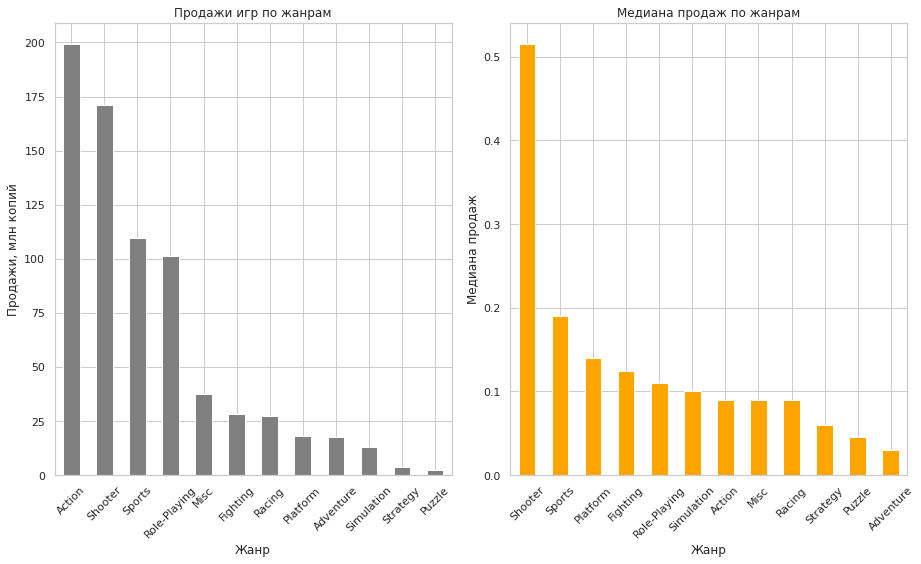

In [129]:
# sns.set_style("darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(13, 8))

genre_table['all_sales'].plot(kind='bar', color='gray', ax=axs[0], legend=False)
axs[0].set_title('Продажи игр по жанрам')
axs[0].set_xlabel('Жанр')
axs[0].set_ylabel('Продажи, млн копий')
axs[0].tick_params(axis='x', rotation=45)

genre_table_median['all_sales'].plot(kind='bar', color='orange', ax=axs[1], legend=False)
axs[1].set_title('Медиана продаж по жанрам')
axs[1].set_xlabel('Жанр')
axs[1].set_ylabel('Медиана продаж')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

посмотрим ящики по жанрам.

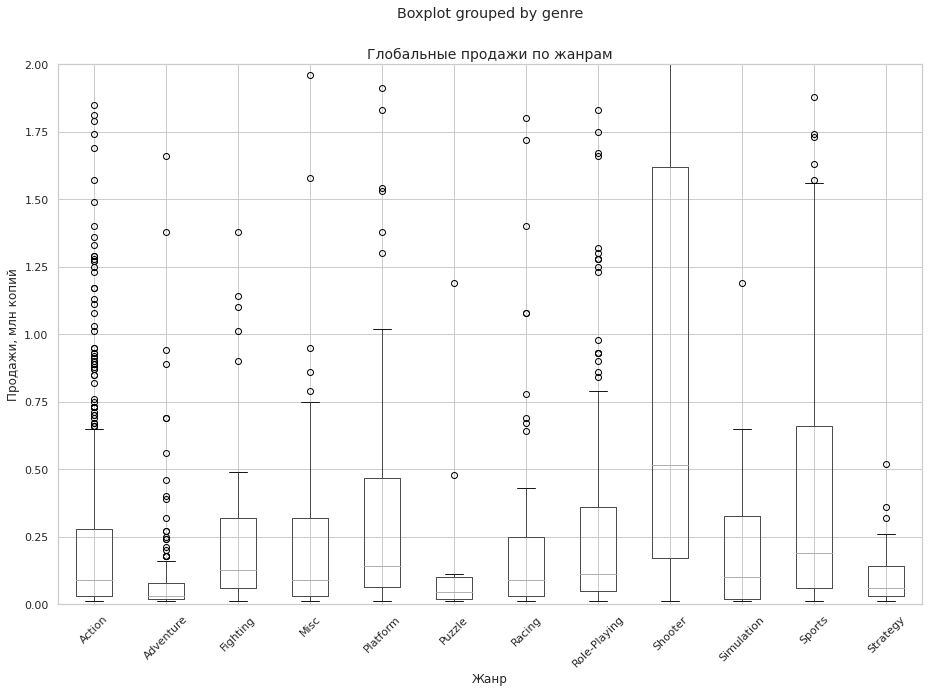

In [130]:
boxplot = actual_df.boxplot('all_sales', by='genre', figsize=(15,10) )
boxplot.set_ylim(0, 2)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи, млн копий', fontsize=12)
plt.title('Глобальные продажи по жанрам', fontsize=14)
plt.show()

#### Вывод

<p><span style="font-family:Arial,Helvetica,sans-serif">Самый распространенный жанр - <strong>Action</strong>, который занимает <strong>27.3%</strong> от всех жанров игр. За ним следуют <strong>Shooter&nbsp;23.4%</strong> и&nbsp; <strong>Sport</strong> и <strong>Role-Playing (15%</strong>&nbsp;&nbsp;<strong>13.9%)</strong>&nbsp;соответственно. </span></p>

<p><span style="font-family:Arial,Helvetica,sans-serif">Самое меньшее количество игр относится к жанрам <strong>Strategy </strong>и<strong>&nbsp;Puzzle </strong>меньше <strong>1%</strong></span></p>

<p><span style="font-family:Arial,Helvetica,sans-serif">Большое количество выпускаемых игр в жанрах Action и Shooter, вероятно, обусловлено их соревновательным характером и привлекательностью для игры в компании друзей. Возможно, организация турниров по таким играм или устраивание мероприятий на основе сарафанного радио среди друзей могут привлечь больше покупателей. В отличие от этого, жанры Puzzle и Strategy, скорее всего, не находят такого широкого спроса.</span></p>

<p><span style="font-family:Arial,Helvetica,sans-serif">При рассмотрении медианных продаж по жанрам лидирует Shooter, в то время как самый распространенный жанр игр, Action, перемещается на&nbsp; 7 место по медианному показателю.</span></p>


## Шаг 4. Портрет пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).

Построим сводную таблицу продаж по платформам и % соотношение продаж в регионе.

In [131]:
actual_df['platform'] = actual_df['platform'].astype(str)

рассчитаем собщие продажи по региону

In [132]:
def calculate_sales_percent(actual_df, region_total_sales):
    return ((actual_df / region_total_sales) * 100).round(1)
regions = ['na', 'jp', 'eu']
sales_by_region = {}
total_sales = {region: actual_df[f'{region}_sales'].sum() for region in regions}


In [133]:
total_sales

{'na': 284.06, 'jp': 92.72999999999999, 'eu': 270.67999999999995}

In [134]:
users = pd.DataFrame()  # Create an empty DataFrame

for region in regions:
    sales_by_platform = actual_df.pivot_table(index='platform',
                                              values=f'{region}_sales',
                                              aggfunc='sum',
                                              observed=False)
    sales_percent = calculate_sales_percent(sales_by_platform, total_sales[region])
    # Assign values to the DataFrame
    users[f'{region}_sales'] = sales_by_platform[f'{region}_sales']
    users[f'{region}_percent'] = sales_percent

users.sort_values(by='na_sales', ascending=False, inplace=True)
users

,na_sales,na_percent,jp_sales,jp_percent,eu_sales,eu_percent
platform,,,,,,
PS4,98.61,34.7,15.02,16.2,130.04,48.0
XOne,81.27,28.6,0.32,0.3,46.25,17.1
X360,28.30,10.0,0.08,0.1,15.49,5.7
3DS,22.64,8.0,44.24,47.7,16.12,6.0
PS3,22.05,7.8,11.22,12.1,25.54,9.4
WiiU,19.36,6.8,7.31,7.9,13.15,4.9
PC,7.23,2.5,0.00,0.0,17.97,6.6
PSV,2.52,0.9,14.54,15.7,3.53,1.3
Wii,2.08,0.7,0.00,0.0,2.59,1.0


посчитаем также общее колличество продаж по регионам

In [136]:
percent_total = {}

for region, sales in total_sales.items():
    percent_total[region] = calculate_sales_percent(sales, sum(total_sales.values()))

print("Общее количество продаж по регионам:")
for region, sales in total_sales.items():
    print(f"{region.capitalize()}: {sales:.1f}")

print("\nПроцентное соотношение продаж по регионам:")
for region, percent in percent_total.items():
    print(f"{region.capitalize()}: {percent:.1f}%")

Общее количество продаж по регионам:
Na: 284.1
Jp: 92.7
Eu: 270.7

Процентное соотношение продаж по регионам:
Na: 43.9%
Jp: 14.3%
Eu: 41.8%


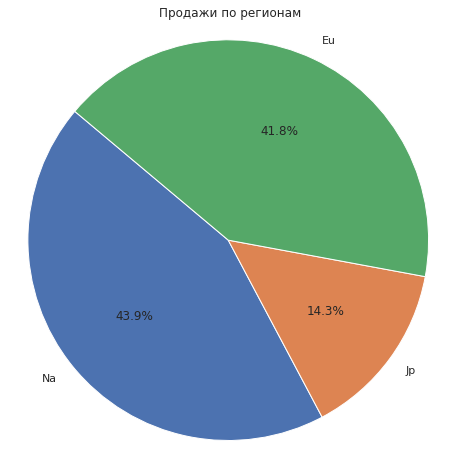

In [137]:
sales_values = list(total_sales.values())
region_labels = [region.capitalize() for region in total_sales.keys()]
plt.figure(figsize=(8, 8))
plt.pie(sales_values, labels=region_labels, autopct='%1.1f%%', startangle=140)
plt.title('Продажи по регионам')
plt.axis('equal') 
plt.show()

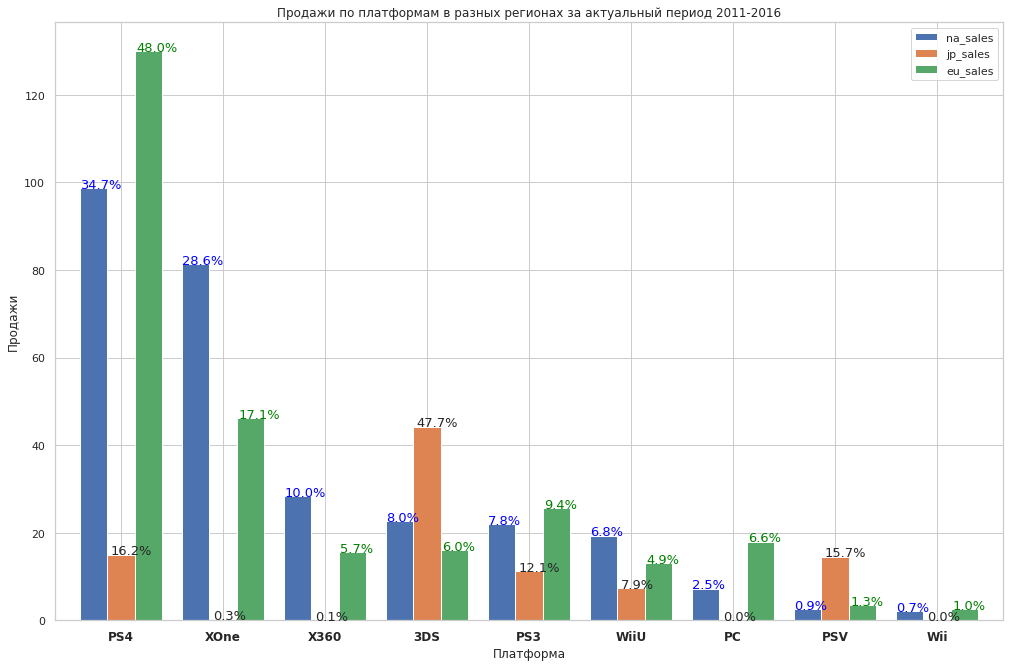

In [138]:
users[['na_sales', 'jp_sales', 'eu_sales']].plot(kind='bar', figsize=(17, 11), width=0.8)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Продажи по платформам в разных регионах за актуальный период 2011-2016')
plt.xticks(rotation=0, fontsize=12, fontweight='bold')

for i, value in enumerate(users.index):
    na_percentage = users.loc[value, 'na_percent']
    jp_percentage = users.loc[value, 'jp_percent']
    eu_percentage = users.loc[value, 'eu_percent']
    plt.annotate(f'{na_percentage}%', (i - 0.4, users.loc[value, 'na_sales']), fontsize=13, color='blue')
    plt.annotate(f'{jp_percentage}%', (i - 0.1, users.loc[value, 'jp_sales']), fontsize=13)
    plt.annotate(f'{eu_percentage}%', (i + 0.15, users.loc[value, 'eu_sales']), fontsize=13, color='green')

plt.show()

#### Вывод


<p><strong>За актуальный период 2014-2016г&nbsp;</strong><br />
Общее колличество продаж по регионам распределяется:</p>

<ul>
	<li><strong>Северная Америка:</strong>&nbsp;284.1 - 41.8%</li>
	<li><strong>Европа:</strong>&nbsp;270.7 - 41.8%</li>
	<li><strong>Япония:</strong>&nbsp;92.7 - 14.3%</li>
</ul>
<ol>
	<li>В Северной Америке и Европе лидируют консольные платформы PS4, X360, XOne, PS3, в то время как в Японии предпочтение отдается портативным платформам,таким как 3DS и PSV.</li>
	<li>PS4 является одной из наиболее популярных платформ в Европе и Северной Америке, в то время как в Японии 3DS занимает лидирующее положение.</li>
	<li>XOne имеет хорошую популярность в Северной Америке и Европе, но его популярность в Японии стримится к нулю.</li>
	<li>PC имеет существенную долю в Европе, что может быть связано с широким распространением игр на этой платформе через цифровые дистрибьюторы и платформы онлайн-распространения.</li>
	<li>Также стоит отметить что платформы Microsoft (X360 и Xone) и PC не популярны в Японии. А консоли Nintendo Wii и WiiU не смотря на то что это их рынок, сильно проигрывают портативным платформам и консолям Sony</li>
</ol>

<p><strong>Топ5</strong>&nbsp;платформ для регионов за период&nbsp;<strong>2014-2016:</strong><br /><br />
<div style="float: left; width: 33%; text-align: left;">
    <p><strong>Северная Америка <br> (% по региону)</strong></p>
    <ul>
        <li>PS4X360 - 34.7%</li>
        <li>XOne - 28.6%</li>
        <li>X360 - 10%</li>
        <li>3DS - 8%</li>
        <li>PS3 - 7.8%</li>
    </ul>
</div>

<div style="float: left; width: 33%; text-align: left;">
    <p><strong>Европа<br>  (% по региону)</strong></p>
    <ul>
        <li>PS4 - 48.0%</li>
        <li>XOne - 17.1%</li>
        <li>PS3 - 9.4%</li>
        <li>PC - 6.6%</li>
        <li>3DS - 6%</li>
    </ul>
</div>

<div style="float: left; width: 33%; text-align: left;">
    <p><strong>Япония <br> (% по региону)</strong></p>
    <ul>
        <li>3DS - 47.7%</li>
        <li>PSV - 15.7%</li>
        <li>PS4 - 16.2%</li>
        <li>PS3 - 12.1%</li>
        <li>WiiU - 7.9%</li>
    </ul>
</div></div>
</p>



### Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры игр (топ-5).

Построим сводную таблицу продаж по жанрам и % соотношение продаж в регионе.

In [139]:
users_genre = pd.DataFrame()

for region in regions:
    sales_by_genre = actual_df.pivot_table(index='genre', 
                                           values=f'{region}_sales', 
                                           aggfunc='sum',
                                           observed=False)
    sales_percent = calculate_sales_percent(sales_by_genre, total_sales[region])
    users_genre[f'{region}_sales'] = sales_by_genre[f'{region}_sales']
    users_genre[f'{region}_percent'] = sales_percent

users_genre.sort_values(by='na_sales', ascending=False, inplace=True)

users_genre

,na_sales,na_percent,jp_sales,jp_percent,eu_sales,eu_percent
genre,,,,,,
Shooter,79.02,27.8,4.87,5.3,65.52,24.2
Action,72.53,25.5,29.38,31.7,74.68,27.6
Sports,46.13,16.2,3.17,3.4,45.73,16.9
Role-Playing,33.47,11.8,31.16,33.6,28.17,10.4
Misc,15.05,5.3,5.59,6.0,12.86,4.8
Fighting,12.43,4.4,6.37,6.9,6.69,2.5
Racing,8.74,3.1,1.76,1.9,14.13,5.2
Platform,6.79,2.4,2.69,2.9,6.80,2.5
Adventure,5.64,2.0,3.55,3.8,6.49,2.4


исключим жанры 'Strategy' и 'Puzzle' из построения гистаграмы

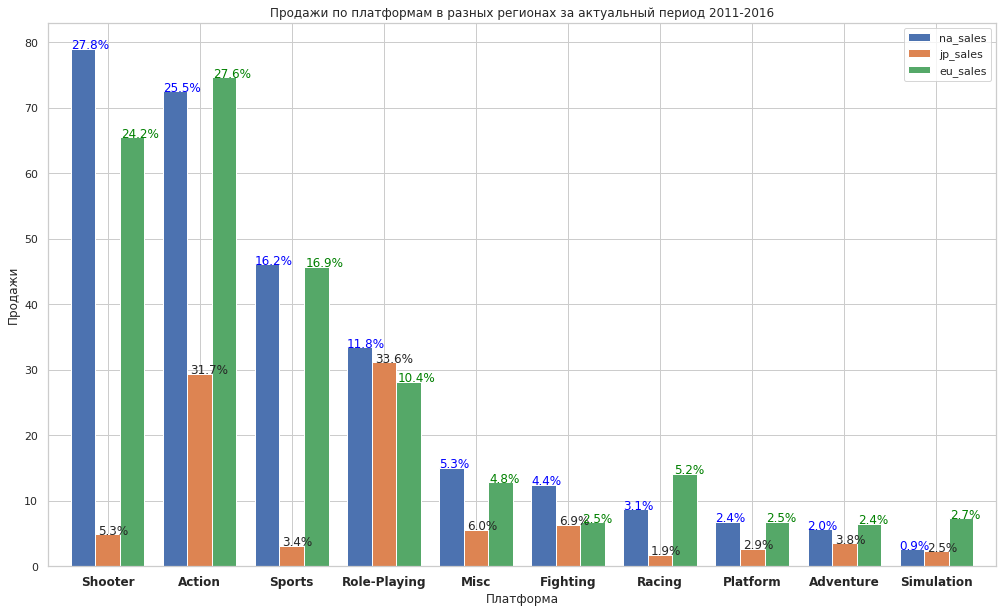

In [140]:
users_genre = users_genre[~users_genre.index.isin(['Strategy', 'Puzzle'])]

users_genre[['na_sales', 'jp_sales', 'eu_sales']].plot(kind='bar', figsize=(17, 10), width=0.8)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Продажи по платформам в разных регионах за актуальный период 2011-2016')
plt.xticks(rotation=0, fontsize=12, fontweight='bold')

for i, value in enumerate(users_genre.index):
    na_percentage = users_genre.loc[value, 'na_percent']
    jp_percentage = users_genre.loc[value, 'jp_percent']
    eu_percentage = users_genre.loc[value, 'eu_percent']
    plt.annotate(f'{na_percentage}%', (i - 0.4, users_genre.loc[value, 'na_sales']), fontsize=12, color='blue')
    plt.annotate(f'{jp_percentage}%', (i - 0.1, users_genre.loc[value, 'jp_sales']), fontsize=12)
    plt.annotate(f'{eu_percentage}%', (i + 0.15, users_genre.loc[value, 'eu_sales']), fontsize=12, color='green')

plt.show()

#### Вывод




<p><strong>За актуальный период 2014-2016г&nbsp;</strong><br />
Общее колличество продаж по регионам распределяется:</p>

<ul>
	<li><strong>Северная Америка:</strong>&nbsp;284.1 - 41.8%</li>
	<li><strong>Европа:</strong>&nbsp;270.7 - 41.8%</li>
	<li><strong>Япония:</strong>&nbsp;92.7 - 14.3%</li>
</ul>


<p><b>Топ5 жанров для регионов за период 2011-2016:</p></b>


<div style="float: left; width: 33%; text-align: left;">
    <p><strong>Северная Америка</strong>&nbsp;(% по региону)</p>
    <ul>
        <li>Shooter - 27.8%</li>
        <li>Action - 25.5%&nbsp;</li>
        <li>Sports - 16.2%</li>
        <li>RPG - 11.8%</li>
        <li>Misc - 5.3%</li>
    </ul>
</div>

<div style="float: left; width: 33%; text-align: left;">
    <p>&nbsp;<strong>Европа</strong>&nbsp;(% по региону)</p>
    <ul>
        <li>Action - 27.6%&nbsp;</li>
        <li>Shooter - 24.2%</li>
        <li>Sports - 16.9%</li>
        <li>RPG - 10.4%</li>
        <li>Racing - 5.2%</li>
    </ul>
</div>

<div style="float: left; width: 33%; text-align: left;">
    <p>&nbsp;<strong>Япония</strong>&nbsp;(% по региону)</p>
    <ul>
        <li>RPG - 33.6%</li>
        <li>Action - 31.7%</li>
        <li>Fighting -&nbsp; 6.9%</li>
        <li>Misc - 5.3%</li>
        <li>Shooter - 5.5%</li>
    </ul>
</div>








<p>В <strong>северной Америке</strong> и <strong>Европе</strong> популярные жанры игр, такие как Action и Shooter, имеют широкую аудиторию. Эти жанры обычно ассоциируются с динамичным геймплеем, соревновательными многопользовательскими режимами и возможностью играть вместе с друзьями. Эти аспекты привлекают множество геймеров в Северной Америке, что объясняет их высокий уровень популярности в этом регионе.</p>
 

<p>В <strong>Японии</strong> жанр RPG доминирует, что связано с предпочтениями и культурными особенностями японского рынка. RPG-игры обычно имеют глубокий сюжет, качественно проработанных персонажей и динамичный геймплей, что соответствует вкусам японских геймеров. Кроме того, портативные игровые платформы имеют большую популярность в Японии из-за высокой мобильности и культуры игры в пути. Это также объясняет высокий интерес к жанрам, которые хорошо адаптированы для портативных устройств.</p>

### Анализ влияние рейтинга ESRB на продажи в отдельном регионе?


Построим сводную таблицу. (изменим Unknown на NaN, и тип столбца)

In [141]:
esrb = pd.DataFrame()
actual_df['rating'] = actual_df['rating'].astype(str)
#actual_df['rating'] = actual_df['rating'].replace('Unknown', np.nan)
for region in regions:
    esrb_by_region = actual_df.pivot_table(index='rating',
                                              values=f'{region}_sales',
                                              aggfunc='sum', 
                                              observed=False)
    esrb_percent = calculate_sales_percent(esrb_by_region, total_sales[region])
    esrb[f'{region}_sales'] = esrb_by_region[f'{region}_sales']
    esrb[f'{region}_percent'] = esrb_percent

esrb.sort_values(by='na_sales', ascending=False, inplace=True)
esrb

,na_sales,na_percent,jp_sales,jp_percent,eu_sales,eu_percent
rating,,,,,,
M,96.42,33.9,8.01,8.6,93.44,34.5
Unknown,64.72,22.8,56.54,61.0,58.95,21.8
E,50.74,17.9,8.94,9.6,58.06,21.4
T,38.95,13.7,14.78,15.9,34.07,12.6
E10+,33.23,11.7,4.46,4.8,26.16,9.7


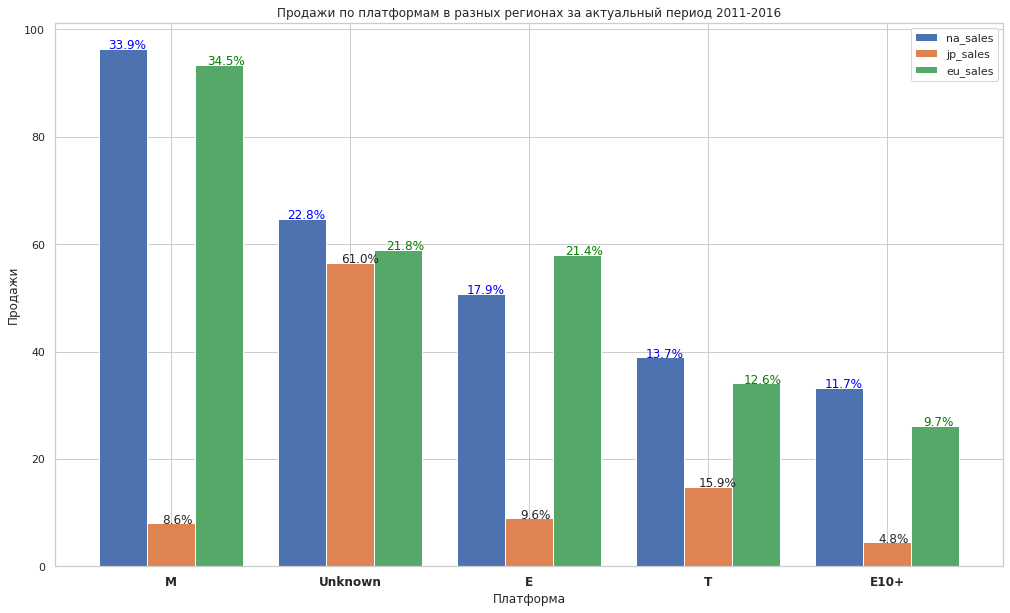

In [142]:
esrb[['na_sales', 'jp_sales', 'eu_sales']].plot(kind='bar', figsize=(17, 10), width=0.8)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Продажи по платформам в разных регионах за актуальный период 2011-2016')
plt.xticks(rotation=0, fontsize=12, fontweight='bold')

for i, value in enumerate(esrb.index):
    na_percentage = esrb.loc[value, 'na_percent']
    jp_percentage = esrb.loc[value, 'jp_percent']
    eu_percentage = esrb.loc[value, 'eu_percent']
    plt.annotate(f'{na_percentage}%', (i - 0.35, esrb.loc[value, 'na_sales']), fontsize=12, color='blue')
    plt.annotate(f'{jp_percentage}%', (i - 0.05, esrb.loc[value, 'jp_sales']), fontsize=12)
    plt.annotate(f'{eu_percentage}%', (i + 0.2, esrb.loc[value, 'eu_sales']), fontsize=12
                 , color='green')

plt.show()

#### Вывод

<p>В столбце&nbsp;<code>rating</code>&nbsp;обычно указывается рейтинг игры, который определяет целевую аудиторию и возрастные ограничения для игры. Вот краткое описание каждого из значений:</p>

<ul>
	<li>
	<p><strong>E</strong>: (Everyone) - Игра подходит для всех возрастов. Обычно содержит минимальное насилие и является безопасной для детей.</p>
	</li>
	<li>
	<p><strong>E10+</strong>: (Everyone 10 and older) - Игра подходит для всех от 10 лет и старше. Может содержать немного более насильственные сцены или ненатуральные и страшные элементы, которые могут быть неподходящими для детей младшего возраста.</p>
	</li>
	<li>
	<p><strong>T</strong>: (Teen) - Игра подходит для подростков от 13 лет и старше. Может содержать некоторое насилие, кровь, непристойный контент или немного грубый язык.</p>
	</li>
	<li>
	<p><strong>M</strong>: (Mature) - Игра подходит для лиц старше 17 лет. Может содержать интенсивное насилие, кровь и кровавые сцены, сексуальный контент и/или грубый язык.</p>
	</li>
</ul>


<b><p>такое колличество пропусков скорее всего потому что мы рассматриваем только рейтинг ERSB&nbsp;</p>
    

<p>ESRB - регулятор в северной америке</p>

<p>PEGI&nbsp; - в Европе</p>

<p>CERO - в Японии.</p>

<p>Возможно если собрать оценки&nbsp; по играм других регуляторов и привести к одной системе. То пропусков будет значительно меньше. и картина измениться.</p>

<p>Исходя из данных о распределении рейтинга игр по регионам, можно сделать следующие выводы:</p>

<ul>
	<li>В Северной Америке наибольшие продажи наблюдаются у игр с рейтингом &quot;M&quot; (Mature) - 96.42 млн копий, что составляет 33.9% от общих продаж в этом регионе. Они также пользуются популярностью в Европе, где составляют 34.5% от общих продаж.</li>
	<li>Несмотря на большое количество продаж без указанного рейтинга (nan), их доля в общих продажах в Японии самая высокая - 61%, что говорит о том, что в этом регионе рейтинг лучше рассмотреть в сумме с PEGI</li>
	<li>Игры с рейтингом &quot;E&quot; (Everyone) также имеют хорошие продажи, особенно в Европе, где их доля составляет 21.4% от общих продаж.</li>
	<li>Игры с рейтингом &quot;T&quot; (Teen) и &quot;E10+&quot; (Everyone 10 and older) также имеют свою аудиторию, но их доли в общих продажах немного ниже.</li>
    
</ul>


In [143]:
titles = {'rating': 'возрастному рейтингу', 'platform' : 'платформам', 'genre' : 'жанрам', 'na_sales' : 'США',\
         'eu_sales' : 'Европе', 'jp_sales' : 'Японии'}
def drow_sales_pl(arg, col):
    df = actual_df.pivot_table(index='year_of_release', columns=col, values=arg, aggfunc='sum')
    fig = plt.figure(figsize=(14,5))
    ax1 = plt.subplot(1, 2, 1)
    ax = sns.heatmap(df, cmap= 'coolwarm', annot=True, fmt = '.1f', square=True, annot_kws={"size":8},cbar=False)
    plt.title("Продажи игр в {} по {} по годам".format(titles.get(arg), titles.get(col)))
    plt.xlabel('Разбивка по {}'.format(titles.get(col)))
    plt.ylabel("Годы")
    ax2 = plt.subplot(1, 2, 2)
    actual_df.groupby(col)[arg].sum().sort_values(ascending=False).head().plot(kind='bar')
    plt.title("Продажи игр в {} по {}, 2013-2016гг".format(titles.get(arg), titles.get(col)))
    plt.xlabel('Разбивка по {}'.format(titles.get(col)))
    plt.ylabel('Продажи, млн.копий')

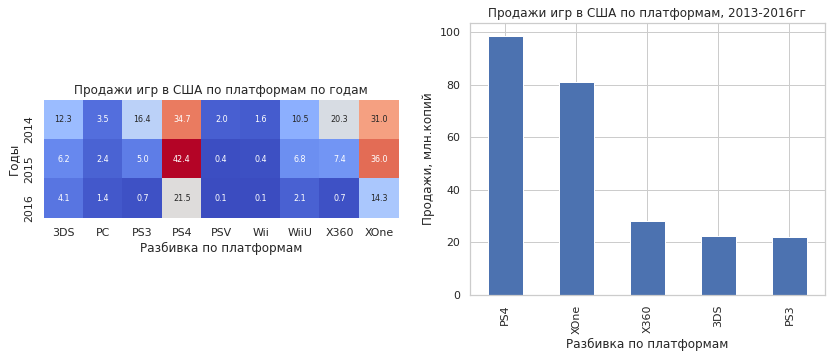

In [144]:
drow_sales_pl('na_sales', 'platform')

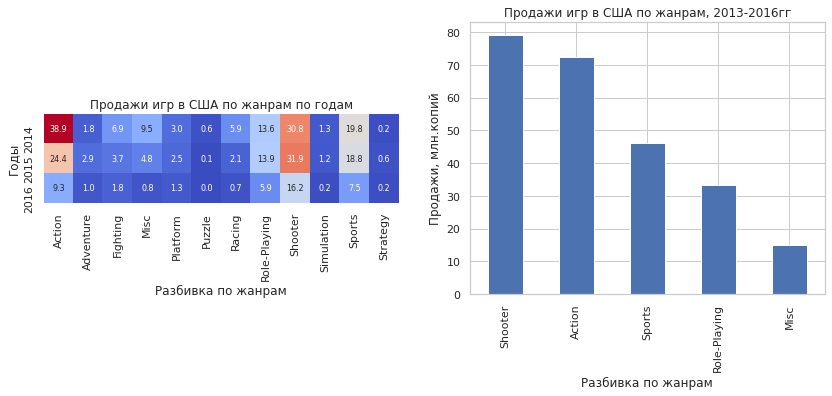

In [145]:
drow_sales_pl('na_sales', 'genre')

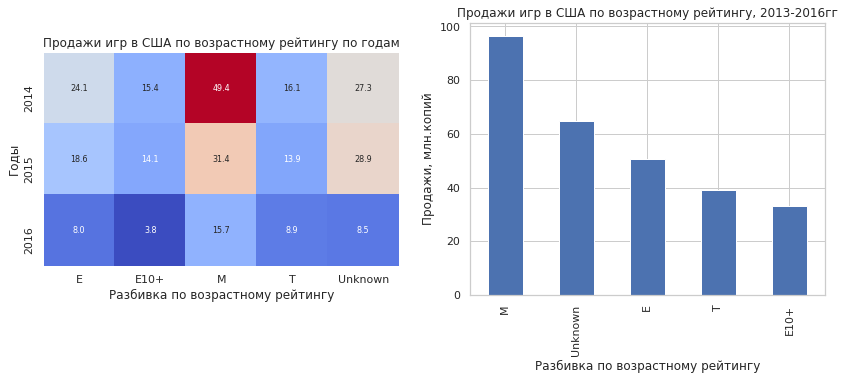

In [146]:
drow_sales_pl('na_sales', 'rating')

## Шаг 5. Проверка гипотез

#### Проверка гипотезы - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

<ul>
	<li>H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.</li>
	<li>H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.</li>
</ul>


In [147]:
import pandas as pd
print(pd.__version__)

1.2.4


In [148]:
actual_df = actual_df.dropna(subset=['user_score'])

In [149]:
print(actual_df['user_score'].unique())

<IntegerArray>
[83, 43, 57, 50, 65, 91, 61, 79, 54, 81, 64, 34, 85, 48, 49, 45, 62, 84, 63,
 77, 92, 76, 87, 67, 70, 41, 82, 68, 55, 75, 44, 59, 72, 69, 39, 42, 32, 86,
 31, 90, 73, 74, 60, 47, 71, 88, 51, 66, 30, 58, 29, 89, 27, 80, 35, 78, 52,
 56, 46, 33, 93, 40, 36, 37, 24, 28, 53, 17, 16, 38, 15,  7, 25, 20, 21,  2,
 19, 14, 23]
Length: 79, dtype: Int64


In [150]:
actual_df['user_score'] = actual_df['user_score'].astype(float)

xbox_one_ratings = actual_df[actual_df['platform'] == 'XOne']['user_score']
pc_ratings = actual_df[actual_df['platform'] == 'PC']['user_score']

alpha = 0.05
t_stat, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)

print(f"p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC различаются.")
else:
    print("Нет оснований отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.")

p-value: 0.11601398086668918
Нет оснований отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


In [151]:
xbox_one_ratings.mean()

65.94545454545455

In [152]:
pc_ratings.mean()

62.98360655737705

#### Вывод



Не отвергаем нулевую гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. И делаем вывод что они не различаются )

#### Проверка гипотезы - Средние пользовательские рейтинги жанров Action и Sports разные.

<ul>
	<li>H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые</li>
	<li>H1: Средние пользовательские рейтинги жанров Action и Sports разные</li>
</ul>


In [153]:
action_ratings = actual_df[actual_df['genre'] == 'Action']['user_score'].dropna()
sports_ratings = actual_df[actual_df['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05
t_stat, p_value = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

print(f"p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные.")
else:
    print("Нет оснований отвергнуть нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковые")

p-value: 1.182555038264477e-14
Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные.


In [154]:
action_ratings.mean()

67.60606060606061

In [155]:
sports_ratings.mean()

52.25196850393701

#### Вывод

Отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги для этих двух жанров одинаковы, и делаем вывод о том, что они различаются.

## Общий вывод

<p>Загрузили данные&nbsp; и провели всю необходимую работу по предобрабоке данных.&nbsp;</p>

<p>Анализируя графики, установили, что большинство платформ в датасете уже не актуальны.&nbsp;</p>

<p>Выбрали актуальный период для проведения аналитической работы.&nbsp;Выявили определяющие успешность игры закономерности. Что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.</p>

<p>&nbsp;</p>


### Динамика изменение продаж за 2011-2016

<p>За актуальный период 2014 - 2016 год видим снижение продаж по всем платформам.</p><br>

<div style="display: flex;">
        <div style="flex: 1; padding-right: 20px;">
            <b>Процентное изменение <br>продаж
                с 2014 по 2016 год:</b>
            <ul>
                <li>3DS: -65.4%</li>
                <li>PC: -60.5%</li>
                <li>PS3: -92.5%</li>
                <li>PS4: -30.7%</li>
                <li>PSV: -64.3%</li>
                <li>Wii: -95.2%</li>
                <li>WiiU: -79.1%</li>
                <li>X360: -95.6%</li>
                <li>XOne: -51.6%</li>
            </ul>
        </div>
        <div style="flex: 1;">
            <b>Процентное изменение продаж <br>с 2015 по 2016 год:</b>
            <ul>
                <li>3DS: -45.5%</li>
                <li>PC: -38.4%</li>
                <li>PS3: -78.6%</li>
                <li>PS4: -41.8%</li>
                <li>PSV: -32.0%</li>
                <li>Wii: -84.2%</li>
                <li>WiiU: -71.9%</li>
                <li>X360: -87.3%</li>
                <li>XOne: -56.5%</li>
            </ul>
        </div>
    </div>





<p>&nbsp;</p>

<div style="display: flex;">
        <div style="flex: 1; padding-right: 20px;">
            <b>Продажи игр за 2015 год:</b>
            <ul>
                <li>PS4: 118.90</li>
                <li>XOne: 60.14</li>
                <li>3DS: 27.78</li>
                <li>PS3: 16.82</li>
                <li>WiiU: 16.35</li>
                <li>X360: 11.96</li>
                <li>PC: 8.52</li>
                <li>PSV: 6.25</li>
                <li>Wii: 1.14</li>
            </ul>
        </div>
        <div style="flex: 1;">
            <b>Продажи игр за 2016 год:</b>
            <ul>
                <li>PS4: 69.25</li>
                <li>XOne: 26.15</li>
                <li>3DS: 15.14</li>
                <li>PC: 5.25</li>
                <li>WiiU: 4.60</li>
                <li>PSV: 4.25</li>
                <li>PS3: 3.60</li>
                <li>X360: 1.52</li>
                <li>Wii: 0.18</li>
            </ul>
        </div>
    </div>


<p></p>



<p>Для прогноза на 2017 год мы можем воспользоваться процентным изменение продаж с 2015 по 2016 год и объёмом продаж 2015 и 2016 года:</p>






### Самые популярные платформы игр (топ-5).

<p><strong>За актуальный период 2014-2016г&nbsp;</strong><br />
Общее колличество продаж по регионам распределяется:</p>

<ul>
	<li><strong>Северная Америка:</strong>&nbsp;284.1 - 41.8%</li>
	<li><strong>Европа:</strong>&nbsp;270.7 - 41.8%</li>
	<li><strong>Япония:</strong>&nbsp;92.7 - 14.3%</li>
</ul>
<ol>
	<li>В Северной Америке и Европе лидируют консольные платформы PS4, X360, XOne, PS3, в то время как в Японии предпочтение отдается портативным платформам,таким как 3DS и PSV.</li>
	<li>PS4 является одной из наиболее популярных платформ в Европе и Северной Америке, в то время как в Японии 3DS занимает лидирующее положение.</li>
	<li>XOne имеет хорошую популярность в Северной Америке и Европе, но его популярность в Японии стримится к нулю.</li>
	<li>PC имеет существенную долю в Европе, что может быть связано с широким распространением игр на этой платформе через цифровые дистрибьюторы и платформы онлайн-распространения.</li>
	<li>Также стоит отметить что платформы Microsoft (X360 и Xone) и PC не популярны в Японии. А консоли Nintendo Wii и WiiU не смотря на то что это их рынок, сильно проигрывают портативным платформам и консолям Sony</li>
</ol>

<p><strong>Топ5</strong>&nbsp;платформ для регионов за период&nbsp;<strong>2014-2016:</strong><br /><br />
<div style="float: left; width: 33%; text-align: left;">
    <p><strong>Северная Америка <br> (% по региону)</strong></p>
    <ul>
        <li>PS4X360 - 34.7%</li>
        <li>XOne - 28.6%</li>
        <li>X360 - 10%</li>
        <li>3DS - 8%</li>
        <li>PS3 - 7.8%</li>
    </ul>
</div>

<div style="float: left; width: 33%; text-align: left;">
    <p><strong>Европа<br>  (% по региону)</strong></p>
    <ul>
        <li>PS4 - 48.0%</li>
        <li>XOne - 17.1%</li>
        <li>PS3 - 9.4%</li>
        <li>PC - 6.6%</li>
        <li>3DS - 6%</li>
    </ul>
</div>

<div style="float: left; width: 33%; text-align: left;">
    <p><strong>Япония <br> (% по региону)</strong></p>
    <ul>
        <li>3DS - 47.7%</li>
        <li>PSV - 15.7%</li>
        <li>PS4 - 16.2%</li>
        <li>PS3 - 12.1%</li>
        <li>WiiU - 7.9%</li>
    </ul>
</div></div>
</p>



### Самые популярные жанры игр (топ-5).


<p><strong>За актуальный период 2014-2016г&nbsp;</strong><br />
Общее колличество продаж по регионам распределяется:</p>

<ul>
	<li><strong>Северная Америка:</strong>&nbsp;284.1 - 41.8%</li>
	<li><strong>Европа:</strong>&nbsp;270.7 - 41.8%</li>
	<li><strong>Япония:</strong>&nbsp;92.7 - 14.3%</li>
</ul>


<p><b>Топ5 жанров для регионов за период 2011-2016:</p></b>


<div style="float: left; width: 33%; text-align: left;">
    <p><strong>Северная Америка</strong>&nbsp;(% по региону)</p>
    <ul>
        <li>Shooter - 27.8%</li>
        <li>Action - 25.5%&nbsp;</li>
        <li>Sports - 16.2%</li>
        <li>RPG - 11.8%</li>
        <li>Misc - 5.3%</li>
    </ul>
</div>

<div style="float: left; width: 33%; text-align: left;">
    <p>&nbsp;<strong>Европа</strong>&nbsp;(% по региону)</p>
    <ul>
        <li>Action - 27.6%&nbsp;</li>
        <li>Shooter - 24.2%</li>
        <li>Sports - 16.9%</li>
        <li>RPG - 10.4%</li>
        <li>Racing - 5.2%</li>
    </ul>
</div>

<div style="float: left; width: 33%; text-align: left;">
    <p>&nbsp;<strong>Япония</strong>&nbsp;(% по региону)</p>
    <ul>
        <li>RPG - 33.6%</li>
        <li>Action - 31.7%</li>
        <li>Fighting -&nbsp; 6.9%</li>
        <li>Misc - 5.3%</li>
        <li>Shooter - 5.5%</li>
    </ul>
</div>






<p>В <strong>северной Америке</strong> и <strong>Европе</strong> популярные жанры игр, такие как Action и Shooter, имеют широкую аудиторию. Эти жанры обычно ассоциируются с динамичным геймплеем, соревновательными многопользовательскими режимами и возможностью играть вместе с друзьями. Эти аспекты привлекают множество геймеров в Северной Америке, что объясняет их высокий уровень популярности в этом регионе.</p>
 

<p>В <strong>Японии</strong> жанр RPG доминирует, что связано с предпочтениями и культурными особенностями японского рынка. RPG-игры обычно имеют глубокий сюжет, качественно проработанных персонажей и динамичный геймплей, что соответствует вкусам японских геймеров. Кроме того, портативные игровые платформы имеют большую популярность в Японии из-за высокой мобильности и культуры игры в пути. Это также объясняет высокий интерес к жанрам, которые хорошо адаптированы для портативных устройств.</p>

###  Потенциально прибыльные платформ


<p>Мы можем выделить две платформы с потенциально высокой прибылью, но стоит учитывать что их падение по последнему году 41 и 56%:</p>

<ul>
	<li><strong>PS4</strong></li>
	<li><strong>XOne</strong></li>
</ul>

<p>Стоит так же обратить внимание на&nbsp;</p>

<ul>
	<li><strong>PC</strong> в список актуальных платформ, так как на этой платформе обычно наблюдаются стабильные продажи.</li>
	<li><strong>3DS -&nbsp;</strong>лидер продаж в Япони и азиатском регионе.</li>
    <li><strong>PS3 -&nbsp;</strong>еще активна во всех регионах.</li>
     
</ul>

<p><strong>! </strong>Ожидается, что в ближайшие время продажи на платформах <strong>X360 и Wii прекратятся</strong>.</p>

<p>Первые 3 места делят между собой консоли. Больше всего продаж у XOne.(колличество 225 игр) Дальше идет PS4(364игры) и WiiU(71игра). 
    
 Далее идет PS3 и 3DS, PC и PSV

3% игр игр с большим объемом продаж

- 3DS	- 10 игр  от 4.59 до 14.6мл
- PS3  - 1 игра 5.2мл
- PS4	- 12 игр  от 4.62 до 14.63мл
- WiiU - 2 игры  от 4.87 до 7.09мл
- Xone - 3 игр  от 5.26 до 7.39мл

</p>


### Статистический анализ и проверка гипотез

<p>После проведения статистического анализа мы пришли к следующим выводам:</p>

<ol>
	<li>
	<p><strong>Сравнение средних пользовательских рейтингов Xbox One и PC:</strong> 
       Не отвергаем нулевую гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. И делаем вывод что они не различаются )</p>
	</li>
	<li>
	<p><strong>Сравнение средних пользовательских рейтингов жанров Action и Sports:</strong> Отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги для этих двух жанров одинаковы, и делаем вывод о том, что они различаются. </p>
	</li>
</ol>

<p>Эти выводы позволяют лучше понять предпочтения пользователей и принимать более обоснованные решения при планировании выпуска и маркетинга игр на различных платформах и в различных жанрах.</p>


### Рекомендации


<p>Основываясь на проведенном анализе данных о продажах видеоигр, можно сделать следующие рекомендации:</p>

<ol>
	<li><strong>Сосредоточиться на потенциально прибыльных платформах:</strong>
	<ul><li>Игры, выпущенные на платформах XOne и PS4, имеют хороший потенциал для успешных продаж. Рекомендуется уделить особое внимание продаже игр для этих консолей.</li>
	</ul>
	</li>
	<li><strong>Адаптировать &nbsp;под региональные предпочтения:</strong>
	<ul>
		<li>При планировании продаж следует учитывать различия в предпочтениях жанров между регионами. Например, в Японии RPG имеют большую популярность, в то время как в Северной Америке и Европе предпочтение отдается Action и Shooter.</li>
	</ul>
	</li>
	<li><strong>Уделить внимание рейтингам и оценкам:</strong>
	<ul>
		<li>Рейтинги и оценки игр имеют значительное влияние на решение игроков о покупке. Рекомендуется сосредоточиться на качественных играх, который оценены позитивно как игроками, так и критиками.</li>
	</ul>
	</li>
	<li><strong>Следить за трендами:</strong>
	<ul>
		<li>Индустрия видеоигр постоянно развивается, поэтому важно следить за трендами и изменениями во вкусах игроков. Это поможет адаптировать стратегию продажи&nbsp;игр и маркетинговые кампании к текущим требованиям рынка.</li>
	</ul>
	</li>
	<li><strong>Использовать географическую специфику:</strong>
	<ul>
		<li>Учитывая различия в предпочтениях регионов, рекомендуется проводить географически ориентированные маркетинговые и рекламные кампании. Это позволит максимизировать продажи и улучшить репутацию игр в различных частях мира.</li>
	</ul>
	</li>
</ol>

<p>Соблюдение этих рекомендаций поможет увеличить шансы на успешных продаж на рынке и повысить их коммерческий успех.</p>
